<a href="https://colab.research.google.com/github/Mr-Katakitchen/ML-NTUA/blob/main/lab1/MM2024_25_Lab2_4_Regularization%2C_Overfitting___Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠️
Επισημαίνεται ότι η σχεδίαση και το περιεχόμενο του notebook αποτελούν αντικείμενο πνευματικής ιδιοκτησίας.

# Ομαλοποίηση, Υπερπροσαρμογή και Υποπροσαρμογή

Το επιθυμητό αποτέλεσμα κάθε διαδικασίας μάθησης είναι το μοντέλο που κατασκευάζεται για ένα δεδομένο πρόβλημα να έχει τη δυνατότητα **γενίκευσης** (generalization), δηλαδή να έχει καλή απόδοση όχι μόνο στα δεδομένα πάνω στα οποία έχει εκπαιδευτεί, αλλά σε οποιοδήποτε δείγμα δεδομένων προέρχεται από το υπό μελέτη πρόβλημα.

Η __βασική υπόθεση__ εργασίας που κάνουμε για την επίλυση προβλημάτων με τεχνικές μηχανικής μάθησης είναι αυτή της στατιστικής προέλευσης των δεδομένων, σύμφωνα με την οποία το κάθε πρόβλημα μοντελοποιείται ως μια *διαδικασία παραγωγής δεδομένων* (data generation process) που καθοδηγείται από μια άγνωστη σε εμάς *κατανομή* (distribution) ή *υποκείμενη συνάρτηση*(underlying function). Έτσι, το ζητούμενο της μάθησης είναι να ανακαλύψουμε τα χαρακτηριστικά της κατανομής ή τις παραμέτρους τις υποκείμενης συνάρτησης. Η παραπάνω διαδικασία είναι επίσης γνωστή και ως *στατιστική θεωρία μάθησης* (statistical learning theory).

Η __δεύτερη υπόθεση__ εργασίας που κάνουμε είναι πως το κάθε δείγμα δεδομένων παράγεται ανεξάρτητα (independent) από τα υπόλοιπα και προφανώς από την ίδια άγνωστη κατανομή (identically distributed).

Αυτά τα δύο χαρακτηριστικά είναι γνωστά ως **i.i.d assumptions** και επειδή θεωρούμε ότι ισχύουν, μας επιτρέπουν να χωρίζουμε τα δεδομένα μας σε *δείγματα εκπαίδευσης* (training set) και *δείγματα ελέγχου* (test set), από τα οποία μόνο τα πρώτα χρησιμοποιούμε στην εκπαίδευση του μοντέλου, ενώ με τα δεύτερα εξετάζουμε τη γενίκευση του μοντέλου.

Έτσι το επιθυμητό αποτέλεσμα είναι να έχουμε ένα όσο το δυνατόν μικρότερο *σφάλμα εκπαίδευσης* (training error) και ένα όσο το δυνατόν παραπλήσιο *σφάλμα γενίκευσης* (generalization error) ή *σφάλμα ελέγχου* (test error)




https://www.kaggle.com/sid321axn/regularization-techniques-in-deep-learning
Regularization: Machine Learning. The solution to over-fitting model, its… | by Gokul S Kumar
https://github.com/Gokul-S-Kumar/Regularization/blob/master/Regualrization.ipynb


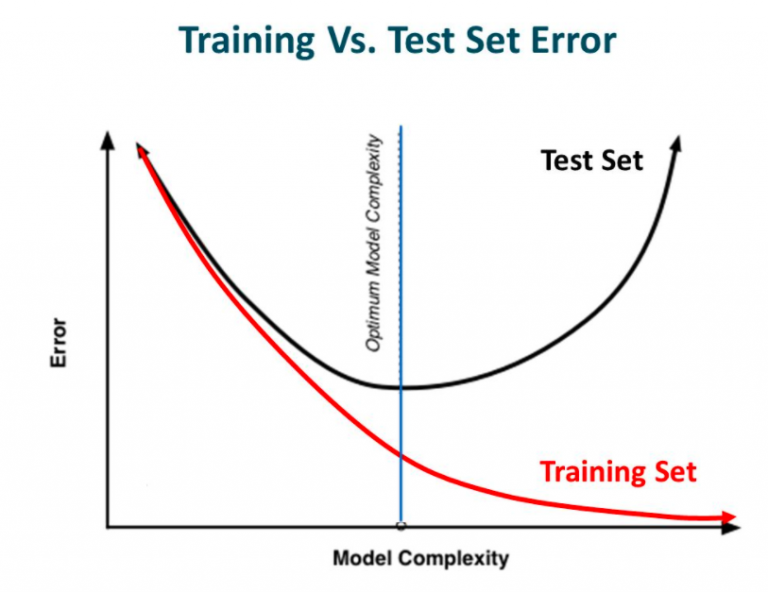

Στο παραπάνω σχήμα απεικονίζεται **η σχέση σφάλματος εκπαίδευσης και γενίκευσης για μεταβαλλόμενη πολυπλοκότητα του μοντέλου**.

Όταν η πολυπλοκότητα του μοντέλου είναι μικρή για το πρόβλημα που καλείται να μάθει, τότε το σφάλμα εκπαίδευσης είναι μεγάλο και το μοντέλο δεν μπορεί να ανακαλύψει τις στατιστικές ιδιότητες των δεδομένων (αριστερό τμήμα του διαγράμματος). Σε αυτή την περίπτωση λέμε ότι το μοντέλο εμφανίζει χαρακτηριστικά **υπό-προσαγμογής** (underfitting).

Από την άλλη, όταν το μοντέλο έχει μεγαλύτερη πολυπλοκότητα από αυτή που απαιτεί το πρόβλημα, τότε αυτό καταλήγει να απομνημονεύει τα ειδικά χαρακτηριστικά των δειγμάτων εκπαίδευσης και δεν μπορεί να γενικεύσει, όπως φαίνεται από τη διαφορά του σφάλματος εκπαίδευσης και ελέγχου στο δεξί τμήμα του σχήματος. Σε αυτή την περίπτωση λέμε ότι το μοντέλο εμφανίζει χαρακτηριστικά **υπερ-προσαρμογής** (overfitting).

Στην ιδανική περίπτωση, το μοντέλο έχει την πολυπλοκότητα που απαιτεί το πρόβλημα που καλείται να επιλύσει, οπότε και μπορεί να μάθει τα δεδομένα εκπαίδευσης (εμφανίζοντας χαμηλό σφάλμα εκπαίδευσης) αλλά μπορεί ταυτόχρονα και να γενικεύσει (εμφανίζοντας παραπλήσιο σφάλμα ελέγχου). Αυτή η κατάσταση απεικονίζεται στο κέντρο του σχήματος (κάθετη μπλε γραμμή), οπότε και θεωρούμε ότι το μοντέλο έχει **προσαρμοστεί** (fit) στο πρόβλημα.

## Χωρητικότητα

Ο τρόπος με τον οποίο εκτιμάται η πολυπλοκότητα ενός μοντέλου είναι η **χωρητικότητά** (capacity) του.

Η χωρητικότητα είναι μια έννοια που καθορίζει την ικανότητα του μοντέλου να γενικεύει και σχετίζεται άμεσα με το **χώρο υποθέσεων** (hypothesis space) του μοντέλου. Και οι δύο έννοιες θα γίνουν περισσότερο κατανοητές στα παραδείγματα που θα ακολουθήσουν.

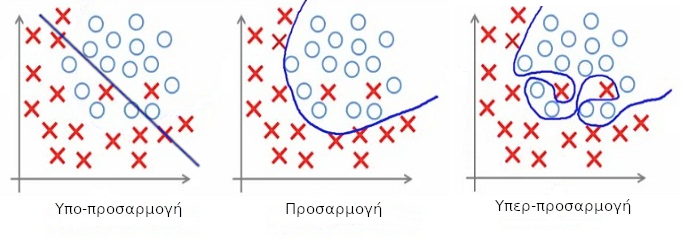

Τα μοντέλα μηχανικής μάθησης έχουν τη βέλτιστη απόδοση όταν η χωρητικότητά τους είναι η κατάλληλη για το πρόβλημα που τους ζητείται να μάθουν. Έτσι, τα μοντέλα με ανεπαρκή χωρητικότητα δεν μπορούν να επιλύσουν πολύπλοκα προβλήματα.

Αυτό φαίνεται και στην περίπτωση του αριστερά διαγράμματος του παραπάνω σχήματος, όπου γίνεται η υπόθεση ότι το δυαδικό πρόβλημα ταξινόμησης που περιγράφεται στο σχεδιάγραμμα είναι γραμμικά διαχωρίσιμο, οπότε αρκεί να προσεγγιστεί από ένα **γραμμικό διαχωριστικό (discriminative) μοντέλο**, δηλαδή μια ευθεία γραμμή. Είναι εμφανές, ότι η ευθεία γραμμή δεν μπορεί να περιγράψει το όριο απόφασης μεταξύ των δύο κλάσεων, οπότε στη συγκεκριμένη περίπτωση το μοντέλο έχει υπεραπλουστεύσει τα δεδομένα, εμφανίζοντας **υψηλή μεροληψία** (high bias).

Από την άλλη, τα μοντέλα με υψηλή χωρητικότητα μπορούν να επιλύουν πολύπλοκα προβλήματα, αλλά ενδέχεται να εμφανίσουν φαινόμενα υπερ-προσαρμογής. Αυτή είναι η περίπτωση του δεξιά σχεδιαγράμματος του παραπάνω σχήματος, όπου το όριο απόφασης του μοντέλου είναι αρκετά "εύκαμπτο", εμφανίζοντας "πτυχώσεις" γύρω από τα δείγματα δεδομένων. Έτσι, σε "παραπλήσια" δεδομένα μπορεί να κάνει διαφορετικές προβλέψεις, εμφανίζοντας **υψηλή διακύμανση** (high variance).

Τέλος, το σχεδιάγραμμα στο κέντρο του σχήματος περιγράφει ένα διαχωριστικό μοντέλο με επαρκή χωρητικότητα για το συγκεκριμένο πρόβλημα. Σε αυτή την περίπτωση επιτυγχάνεται η προσαρμογή, που είναι το ζητούμενο καθώς και **ισορροπία μεταξύ μεροληψίας και διακύμανσης (bias-variance trade-off)**.

Στη συνέχεια αυτού του notebook, θα δούμε τα ζητήματα της υπο-προσαρμογής, της υπερ-προσαρμογής και της εύρεσης της βέλτιστης χωρητικότητας ενός μοντέλου, μέσω ενός παραδείγματος παλινδρόμησης.


## Εισαγωγή βιβλιοθηκών

Το πρώτο βήμα είναι να εισάγουμε στο notebook τις βιβλιοθήκες που πρόκειται να χρησιμοποιήσουμε. Θα βασιστούμε στο scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# σπορά για την παραγωγή των ψευδοτυχαίων αριθμών (για την αναπαραγωγισιμότητα
# των αποτελεσμάτων)
seed_value = 42

## Ορισμός βοηθητικών συναρτήσεων

Εδώ ορίζουμε κάποιες βοηθητικές συναρτήσεις, ξεκινώντας από τον υπολογισμό των μετρικών της απόδοσης (Ορθότητα, Μέσο Τετραγωνικό Σφάλμα)

In [ ]:
def compute_metrics(model, x_tr, y_tr, x_ts, y_ts):
  train_predict = model.predict(x_tr)
  test_predict = model.predict(x_ts)

  # Υπολογισμός Ορθότητας (Accuracy)
  train_accuracy = r2_score(y_tr, train_predict)
  test_accuracy = r2_score(y_ts, test_predict)

  # Υπολογισμός Μέσου Τετραγωνικού Σφάλματος
  train_MSE = mean_squared_error(y_tr, train_predict)
  test_MSE = mean_squared_error(y_ts, test_predict)

  print('Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: {:.2%}'.format(train_accuracy))

  print('Ορθότητα στο σύνολο δεδομένων ελέγχου: {:.2%}\n'.format(test_accuracy))

  print('Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: {:.4f}'.format(train_MSE))

  print('Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: {:.4f}'.format(test_MSE))

Σχεδίαση γραφικών παραστάσεων υποκείμενης συνάρτησης, μοντέλου και δειγμάτων εκπαίδευσης/ελέγχου

In [ ]:
def compare_plots(data, x_tr, y_tr, x_ts, y_ts, y_pr, y_md):
  fig = plt.figure(figsize = (20,10))

  ax1 = fig.add_subplot(1, 2, 1)

  ax2 = fig.add_subplot(1, 2, 2)

  ax1.scatter(x_tr, y_tr, color = 'k', label = 'Δείγματα εκπαίδευσης')
  ax1.plot(data, np.cos(1.2 * data * np.pi), linewidth = 3, label ='Υποκείμενη Συνάρτηση')
  ax1.plot(data, y_md, label = 'Μοντέλο', linewidth=3)
  ax1.legend()
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')

  ax2.scatter(x_ts, y_ts, color = 'r', label = 'Δείγματα ελέγχου')
  ax2.plot(data, np.cos(1.2 * data * np.pi), linewidth = 3, label ='Υποκείμενη Συνάρτηση')
  ax2.scatter(x_ts, y_pr, color = 'g', label = 'Προβλέψεις μοντέλου')
  plt.legend()
  ax2.set_xlabel('x')
  ax2.set_ylabel('y')

Εμφάνιση όρων πολυωνύμου

In [ ]:
def output_polynomial(x, y):
  s = ''
  for i in range(len(x)-1,0,-1):
    s += '{:.2f}x^{} + '.format(x[i], i)

  s += '{:.2f}'.format(y)

  return s

## Δημιουργία των δεδομένων

Δημιουργούμε ένα δικό μας, συνθετικό σύνολο δεδομένων για ένα πρόβλημα παλινδρόμησης, το οποίο αποτελείται από ένα μόνο χαρακτηριστικό $x$. Πιο συγκεκριμένα, η σχέση που συνδέει την είσοδο $x$ με την έξοδο $y$ είναι η $y = \cos(1,2\pi x)$, στην οποία θα προστεθεί και μικρή ποσότητα γκαουσιανού θορύβου. Συνολικά θα δημιουργήσουμε 100 ομοιόμορφα τυχαία δείγματα στο $[0,1]$ και θα υπολογίσουμε τις αντίστοιχες τιμές τους.

In [ ]:
np.random.seed(seed_value)
x = np.sort(np.random.rand(100))
y = np.cos(1.2 * x * np.pi) + (0.1 * np.random.randn(100))

Χρησιμοποιώντας τη μέθοδο *train_test_split()* του submodule model_selection του scikit-learn, χωρίζουμε το dataset μας τυχαία σε σύνολο δεδομένων εκπαίδευσης (80%) και ελέγχου (20%)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=seed_value)

Σχεδιάζουμε τα δείγματα των συνόλων δεδομένων μας (εκπαίδευσης, ελέγχου) καθώς και την υποκείμενη συνάρτηση

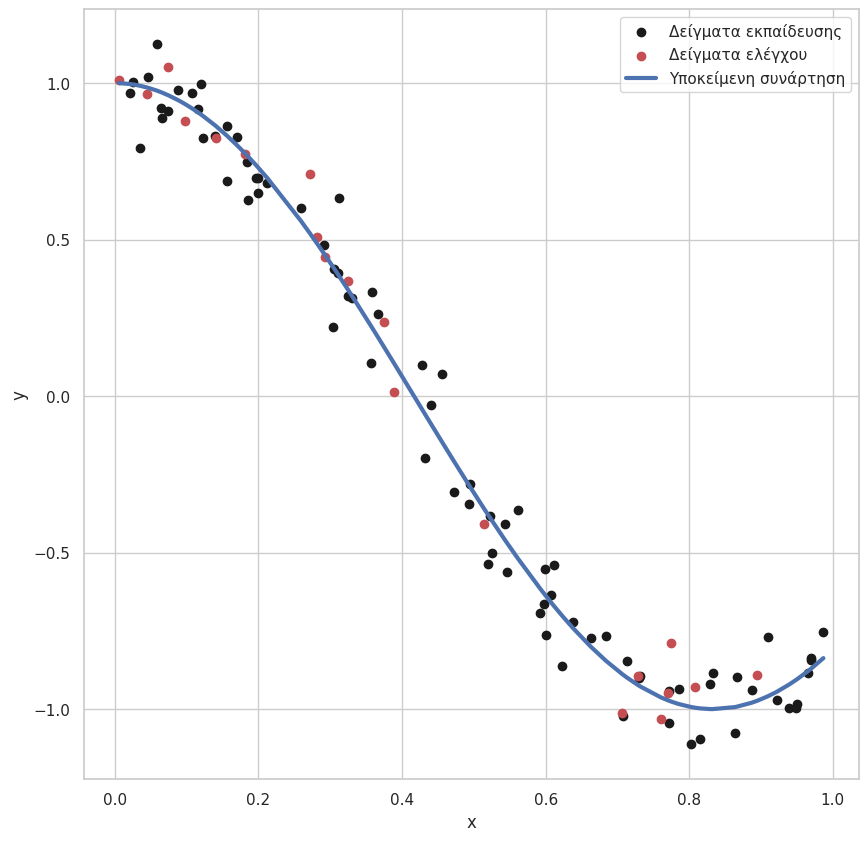

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
plt.scatter(X_train, Y_train, color = 'k', label = 'Δείγματα εκπαίδευσης')
plt.scatter(X_test, Y_test, color = 'r', label = 'Δείγματα ελέγχου')
plt.plot(x, np.cos(1.2 * x * np.pi), linewidth = 3, label = 'Υποκείμενη συνάρτηση')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


Εδώ πρέπει να τονιστεί ότι την υποκείμενη συνάρτηση που συνδέει τα χαρακτηριστικά της εισόδου με την έξοδο δεν την γνωρίζουμε και το πραγματικό ζητούμενο είναι να την προσεγγίσουμε.

Άρα, αυτό που πραγματικά βλέπουμε είναι μόνο τα δείγματα των δεδομένων (άξονας $x$) και τις ετικέτες (όταν έχουμε πρόβλημα ταξινόμησης) ή τις τιμές της εξόδου $y$ (όταν έχουμε πρόβλημα παλινδρόμηση, όπως εδώ), όπως παρακάτω

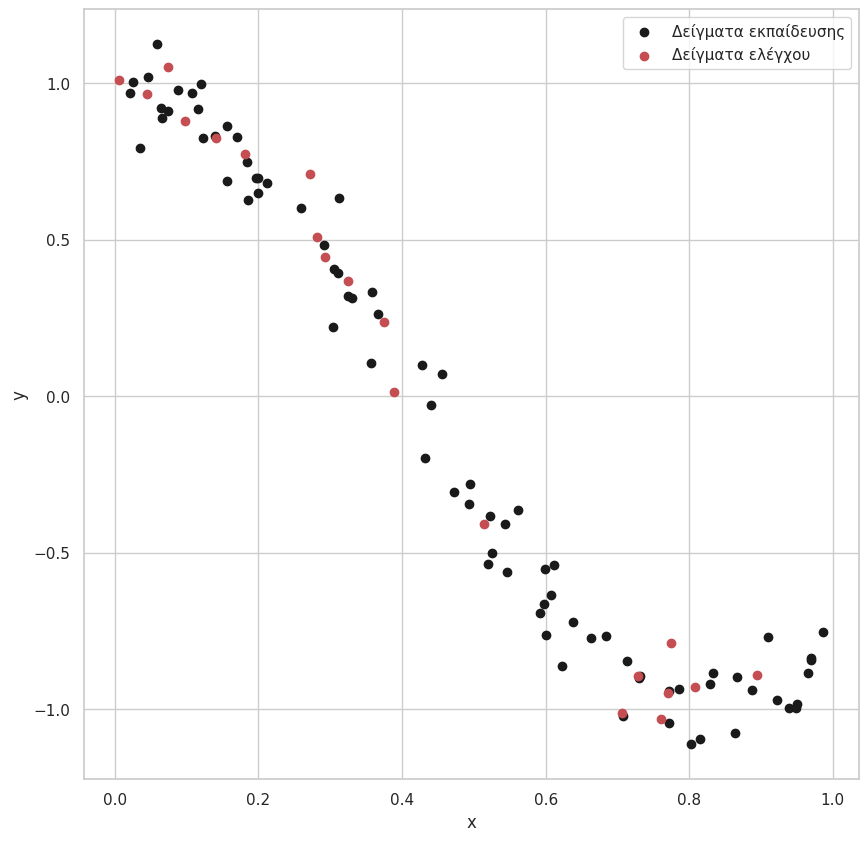

In [ ]:
ig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
plt.scatter(X_train, Y_train, color = 'k', label = 'Δείγματα εκπαίδευσης')
plt.scatter(X_test, Y_test, color = 'r', label = 'Δείγματα ελέγχου')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Τέλος θα αλλάξουμε το σχήμα των δειγμάτων εκπαίδευσης και ελέγχου, φέρνοντας τα σε μορφή κατάλληλη για τις κλάσεις του scikit learn που πρόκειται να χρησιμοποιήσουμε στη συνέχεια.



In [ ]:
x_train = X_train.reshape(-1,1)
x_test = X_test.reshape(-1,1)

## Γραμμική παλινδρόμηση

Όπως τονίσαμε προηγουμένως, δεν γνωρίζουμε καθόλου την υποκείμενη συνάρτηση που συνδέει τα χαρακτηριστικά της εισόδου με τις τιμές της εξόδου. Γι' αυτό ξεκινάμε με μια πολύ απλή υπόθεση εργασίας, ότι αυτά συνδέονται γραμμικά μεταξύ τους, δηλαδή ισχύει
\begin{equation}
y = \alpha_1*x + \alpha_0
\end{equation}

Στη γενική περίπτωση τα $y,x,\alpha_1$ και $\alpha_0$ είναι διανυσματικά μεγέθη, αλλά σε αυτό το παράδειγμα είναι μονόμετρα μεγέθη.

Η γραμμική παλινδρόμηση υλοποιείται στο scikit-learn μέσω της κλάσης  *LinearRegression*


In [ ]:
lr = LinearRegression()
lr.fit(x_train, Y_train)

print('y = {:.2f}*x + {:.2f}'.format(lr.coef_[0], lr.intercept_))

compute_metrics(lr, x_train, Y_train, x_test, Y_test)

y = -2.43*x + 1.06
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 92.22%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 95.54%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0437
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0278


Στη συνέχεια θα σχεδιάσουμε την υποκείμενη συνάρτηση, μαζί με την προσέγγιση που κάνει το μοντέλο μας

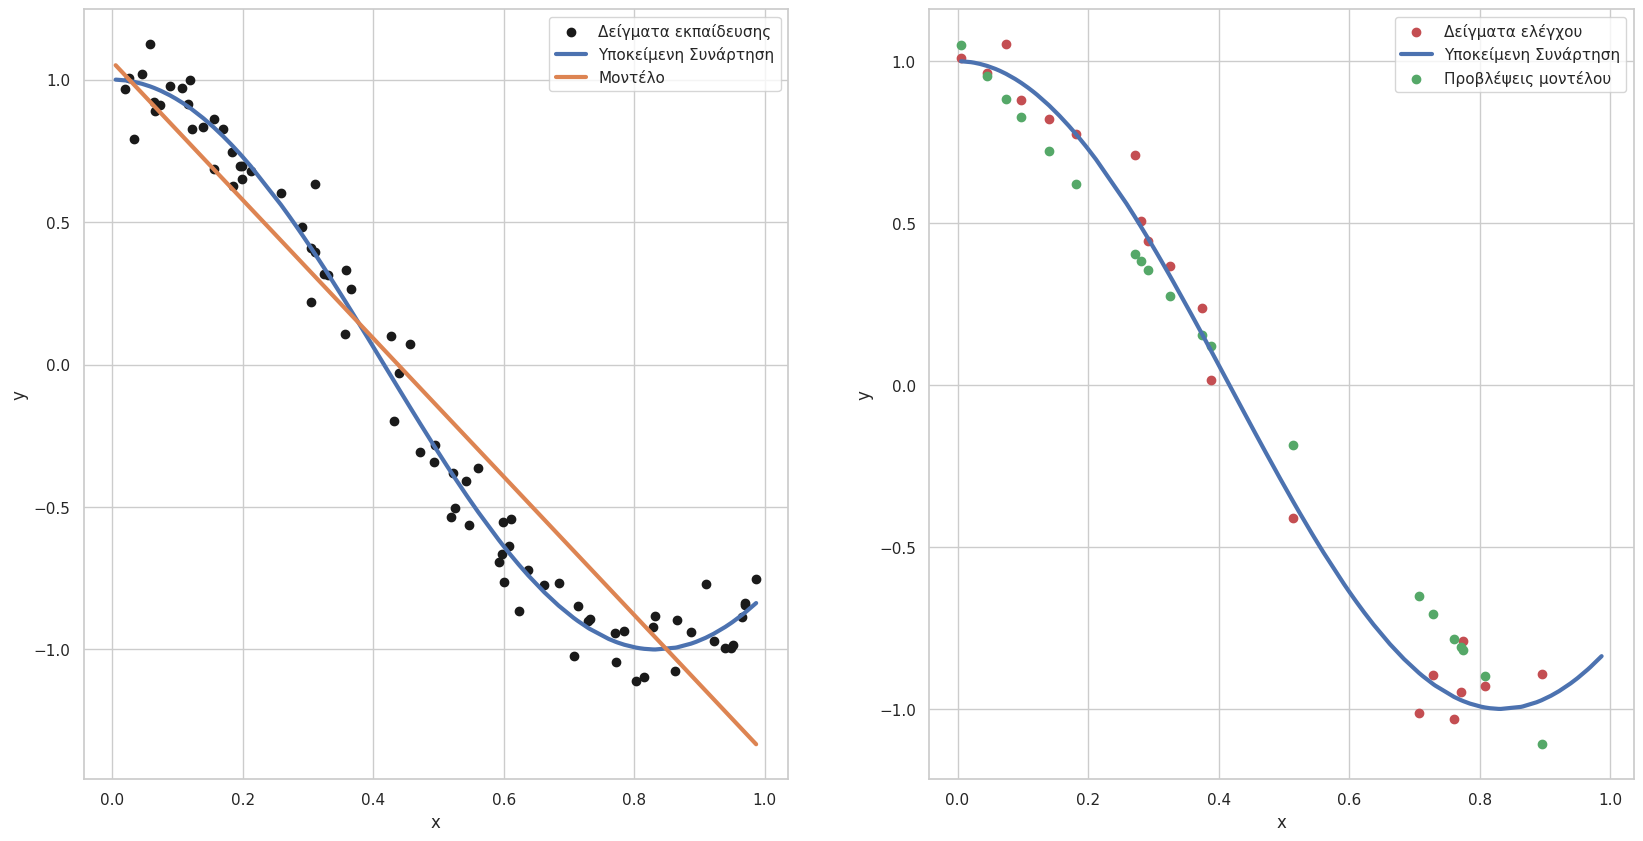

In [ ]:
compare_plots(x, X_train, Y_train, X_test, Y_test, lr.predict(x_test),lr.predict(x.reshape(-1,1)))


Από τις μετρικές απόδοσης αλλά και από τις γραφικές παραστάσεις φαίνεται πως βρισκόμαστε σε περίπτωση υπο-προσαρμογής, μιας και το μοντέλο γραμμικής παλινδρόμησης δεν έχει τη χωρητικότητα που απαιτείται για να προσεγγίσει την υποκείμενη συνάρτηση.

Με άλλα λόγια, **το μοντέλο επιδεικνύει υψηλή προκατάληψη (high bias)** και δεν μπορεί να "μάθει" από τα δείγματα εκπαίδευσης (φαίνεται και από το γεγονός ότι τα τοποθετεί όλα σε μια ευθεία γραμμή).

Ο τρόπος που αντιμετωπίζουμε την υποπροσαρμογή είναι αυξάνοντας τη χωρητικότητα του μοντέλου, όπως θα δούμε ακριβώς παρακάτω.

## Πολυωνυμική Παλινδρόμηση

### Τετραγωνικό μοντέλο

Θα αυξήσουμε τη χωρητικότητα του μοντέλου κατά ένα βαθμό, εξετάζοντας ένα τετραγωνικό, δηλαδή ένα πολυωνυμικό μοντέλο δευτέρου βαθμού. Σε αυτή την περίπτωση η σχέση μεταξύ δειγμάτων εισόδου και εξόδου διαμορφώνεται ως εξής:
\begin{equation}
y = \alpha_2*x^2 + \alpha_1*x + \alpha_0
\end{equation}
Στο scikit learn, η πολυωνυμική παλινδρόμηση υλοποιείται ως επέκταση της γραμμικής, με την χρήση της κλάσης *PolynomialFeatures*. Η τελευταία μετασχηματίζει την είσοδο $x$ σε ένα array $[1\enspace x\enspace x^2]$, το οποίο στη συνέχεια παρέχεται στη *LinearRegression* που μαθαίνει τους όρους του (συντελεστές) τους.

In [ ]:
pf2 = PolynomialFeatures(degree=2)

# Μετασχημάτησε κάθε δείγμα από ένα array [x] ενός στοιχείου σε ένα array της
# μορφής [1 x x**2]
x_train2 = pf2.fit_transform(x_train)
x_test2 = pf2.fit_transform(x_test)

pr2 = LinearRegression()
pr2.fit(x_train2, Y_train)

print('y = {:.2f}x^2 + {:.2f}x + {:.2f}'.format(pr2.coef_[-1], pr2.coef_[-2], pr2.intercept_))

compute_metrics(pr2, x_train2, Y_train, x_test2, Y_test)

y = 1.77x^2 + -4.18x + 1.34
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 95.40%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 94.97%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0258
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0313


Όπως και προηγουμένως, σχεδιάζουμε  την υποκείμενη συνάρτηση, μαζί με την προσέγγιση που κάνει το μοντέλο μας

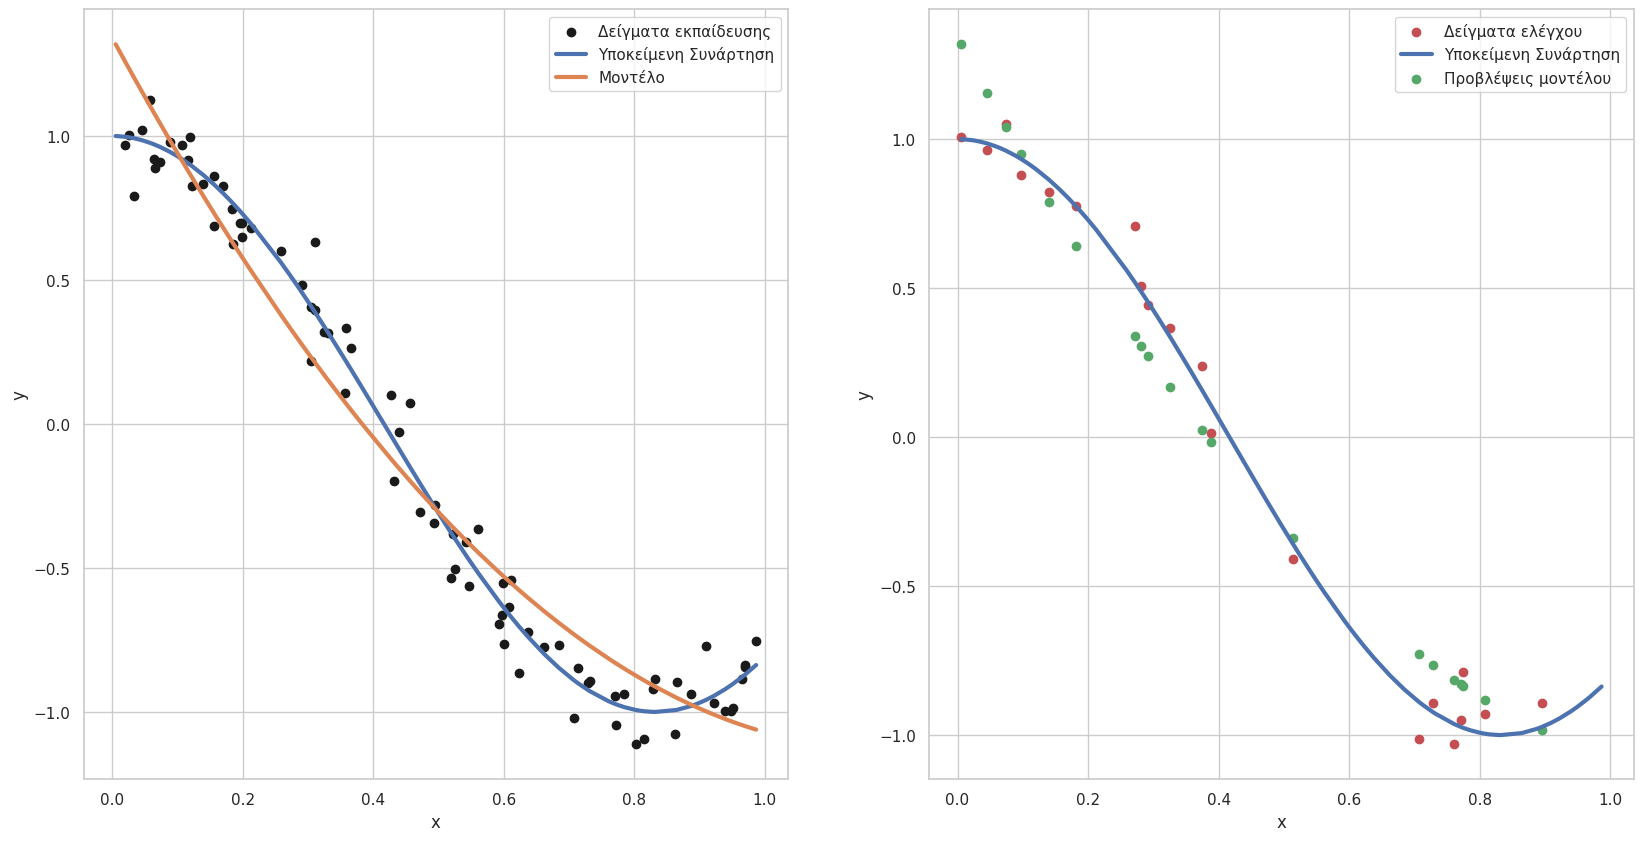

In [ ]:
compare_plots(x, X_train, Y_train, X_test, Y_test, pr2.predict(x_test2), pr2.predict(pf2.transform(x.reshape(-1,1))))

Με την αύξηση της χωρητικότητας, παρατηρούμε αύξηση της ορθότητας και μείωση του μέσου τετραγωνικού σφάλματος.

Επίσης οι μετρικές απόδοσης είναι καλύτερες στα δεδομένα εκπαίδευσης, απ' ότι στα δεδομένα ελέγχου, δείγμα του ότι **το τετραγωνικό μοντέλο έχει χωρητικότητα που του επιτρέπει να "μάθει" (ως ένα βαθμό) από τα δεδομένα εκπαίδευσης** και συνεπώς να **προσεγγίσει** καλύτερα την **υποκείμενη συνάρτηση**.

### Πολυωνυμικό μοντέλο 15ου βαθμού

Βλέποντας ότι κινούμαστε προς τη σωστή κατεύθυνση, θα αυξήσουμε και άλλο τη χωρητικότητα του πολυωνυμικού μοντέλου, εξετάζοντας ένα μοντέλο 15ου βαθμού
\begin{equation}
y = \sum\limits_{i=0}^{15} a_i*x^i
\end{equation}

In [ ]:
deg=15
pf = PolynomialFeatures(degree=deg)

x_train_p = pf.fit_transform(x_train)
x_test_p = pf.fit_transform(x_test)

pr = LinearRegression()
pr.fit(x_train_p, Y_train)

print('y = ',output_polynomial(pr.coef_, pr.intercept_))

compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)

y =  -6958139.64x^15 + 51838379.02x^14 + -175009602.80x^13 + 354397646.75x^12 + -480185450.84x^11 + 459737329.70x^10 + -320139022.90x^9 + 164373893.74x^8 + -62396106.87x^7 + 17389454.41x^6 + -3496811.49x^5 + 491799.00x^4 + -45879.03x^3 + 2583.27x^2 + -74.83x^1 + 1.75
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.65%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 97.46%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0076
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0158


Σχεδιάζουμε  την υποκείμενη συνάρτηση, μαζί με την προσέγγιση που κάνει το μοντέλο μας

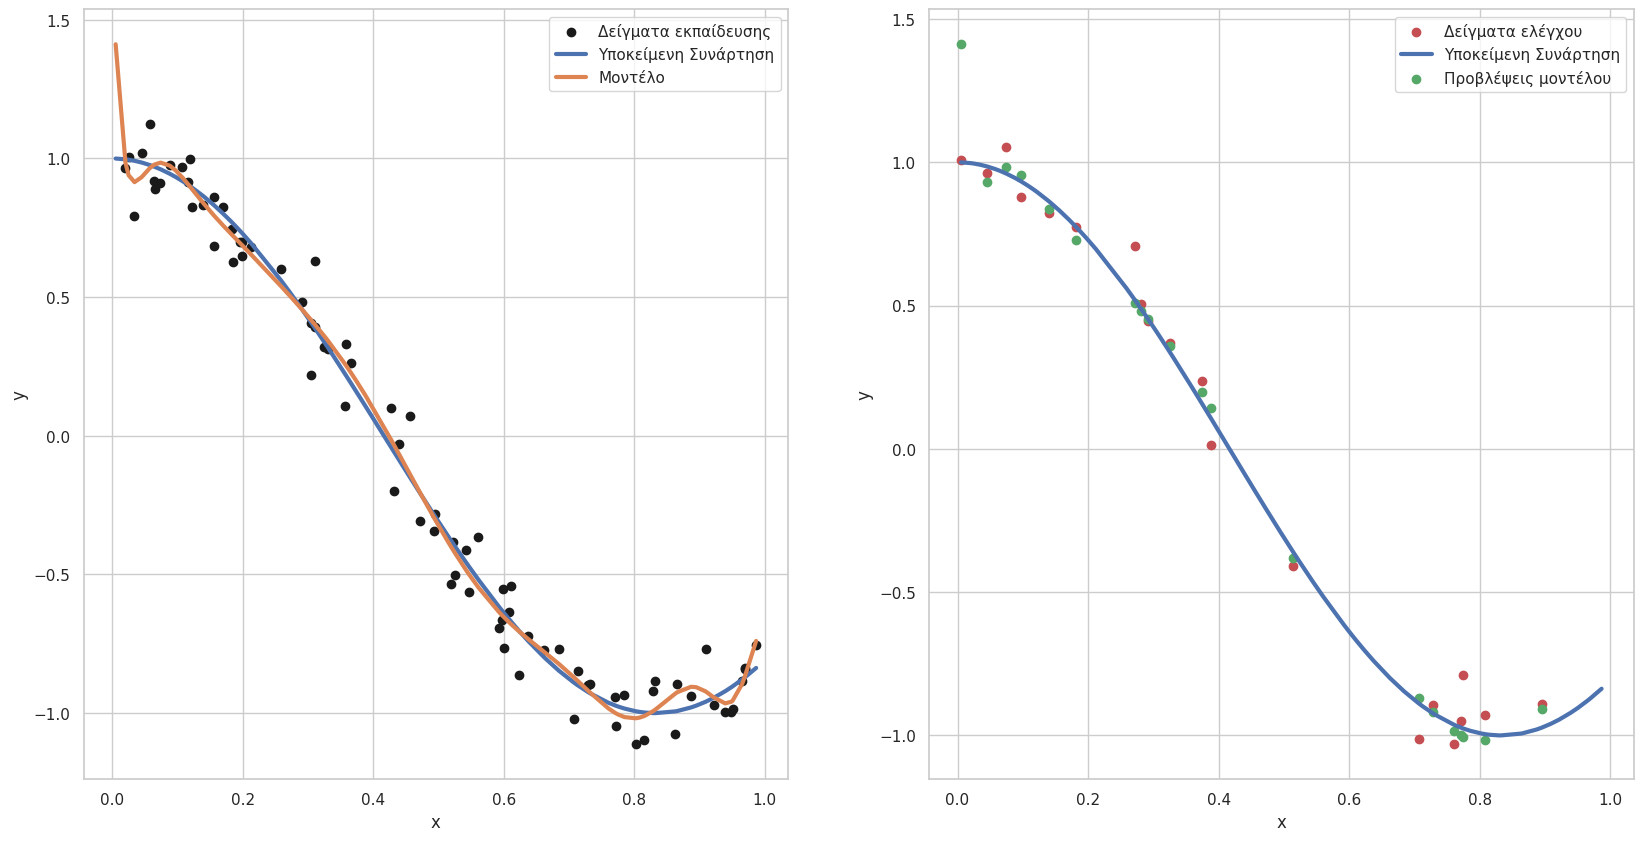

In [ ]:
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p), pr.predict(pf.fit_transform(x.reshape(-1,1))))

Σε αυτή την περίπτωση η συνάρτηση του μοντέλου μας εμφανίζεται αρκετά "παραμορφωμένη" και "εύκαμπτη", έτσι ώστε να διέρχεται μεταξύ των δειγμάτων εκπαίδευσης.

Εδώ πρέπει να θυμηθούμε ότι έχουμε προσθέσει και μια ποσότητα γκαουσιανού θορύβου, οπότε το μοντέλο μας, έχοντας πιο μεγάλη χωρητικότητα από αυτή που απαιτεί το πρόβλημα, προσπαθεί να "μάθει" τα χαρακτηριστικά αυτού του θορύβου (ειδικά στο κάτω δεξιά μέρος της γραφικής παράστασης).

Επίσης, αν παρατηρήσουμε τις μετρικές απόδοσης, παρατηρούμε ότι είναι πολύ καλύτερες στα δείγματα εκπαίδευσης, απ' ότι στα δείγματα ελέγχου (ειδικά στην περίπτωση του Μέσου Τετραγωνικού Σφάλματος η διαφορά είναι μια τάξη μεγέθους).

Με πιο απλά λόγια, **το μοντέλο μας** σε αυτή την περίπτωση **αδυνατεί να γενικεύσει**, "απομνημονεύοντας" επί της ουσίας μόνο τα χαρακτηριστικά των συγκεκριμένων δειγμάτων εκπαίδευσης. Συνεπώς, βρισκόμαστε στην περίπτωση της **υπερ-προσαρμογής**.

### Εύρεση του κατάλληλου βαθμού

Προφανώς και οι δύο καταστάσεις (υποπροσαρμογή, υπερπροσαρμογή) είναι μη-επιθυμητές.

Για το λόγο αυτό, επιθυμούμε να βρούμε ένα μοντέλο το οποίο θα μπορεί να γενικεύει ή διαφορετικά του οποίου η χωρητικότητα θα είναι η κατάλληλη για το συγκεκριμένο πρόβλημα.

Ένας απλοϊκός τρόπος σκέψης είναι ο εξής. Να σχεδιάσουμε τις μετρικές απόδοσης του πολυωνυμικού μοντέλου για διαφορετικές χωρητικότητας (βαθμούς) και να επιλέξουμε εκείνο το βαθμό που εμφανίζει τα καλύτερα χαρακτηριστικά.

Έτσι υπολογίζουμε τις τιμές των μετρικών μας στα δείγματα εκπαίδευσης και ελέγχου για πολυωνυμικά μοντέλα από βαθμό 1 (γραμμικό, που είδαμε ότι εμφανίζει υποπροσαρμογή) μέχρι και βαθμό 15 (που είδαμε ότι εμφανίζει υπερπροσαρμογή).

In [ ]:
Train_acc = []
Test_acc = []
Train_MSE = []
Test_MSE = []

for i in range(15):
  pf = PolynomialFeatures(degree=(i+1))

  x_train_p = pf.fit_transform(x_train)
  x_test_p = pf.fit_transform(x_test)

  pr = LinearRegression()
  pr.fit(x_train_p, Y_train)

  Train_acc.append(pr.score(x_train_p, Y_train))
  Test_acc.append(pr.score(x_test_p, Y_test))

  Train_MSE.append(mean_squared_error(Y_train, pr.predict(x_train_p)))
  Test_MSE.append(mean_squared_error(Y_test, pr.predict(x_test_p)))


Test_min_degree = Test_MSE.index(min(Test_MSE)) + 1
Train_min_degree = Train_MSE.index(min(Train_MSE)) + 1

print('To ελάχιστο ΜΤΣ στα δείγματα εκπαίδευσης προκύπτει για βαθμό πολυωνύμου',Train_min_degree)

print('To ελάχιστο ΜΤΣ στα δείγματα ελέγχου προκύπτει για βαθμό πολυωνύμου',Test_min_degree)

To ελάχιστο ΜΤΣ στα δείγματα εκπαίδευσης προκύπτει για βαθμό πολυωνύμου 15
To ελάχιστο ΜΤΣ στα δείγματα ελέγχου προκύπτει για βαθμό πολυωνύμου 5


Παρατηρούμε δηλαδή ότι το ΜΤΣ, ενώ στα δεδομένα εκπαίδευσης είναι χαμηλότερο για την ακραία τιμή του διαστήματος που εξετάσαμε (και άρα ενδεχομένως να μειωνόταν και άλλο αν εξετάζαμε και μεγαλύτερες τιμές χωρητικότητας), για τα δεδομένα ελέγχου σταματάει να βελτιώνεται μετά τον 5ο βαθμό. Αυτό φαίνεται ακόμα καλύτερα αν σχεδιάσουμε τις τιμές των μετρικών ως προς τον βαθμό του πολυωνύμου.

Text(0, 0.5, 'ΜΤΣ')

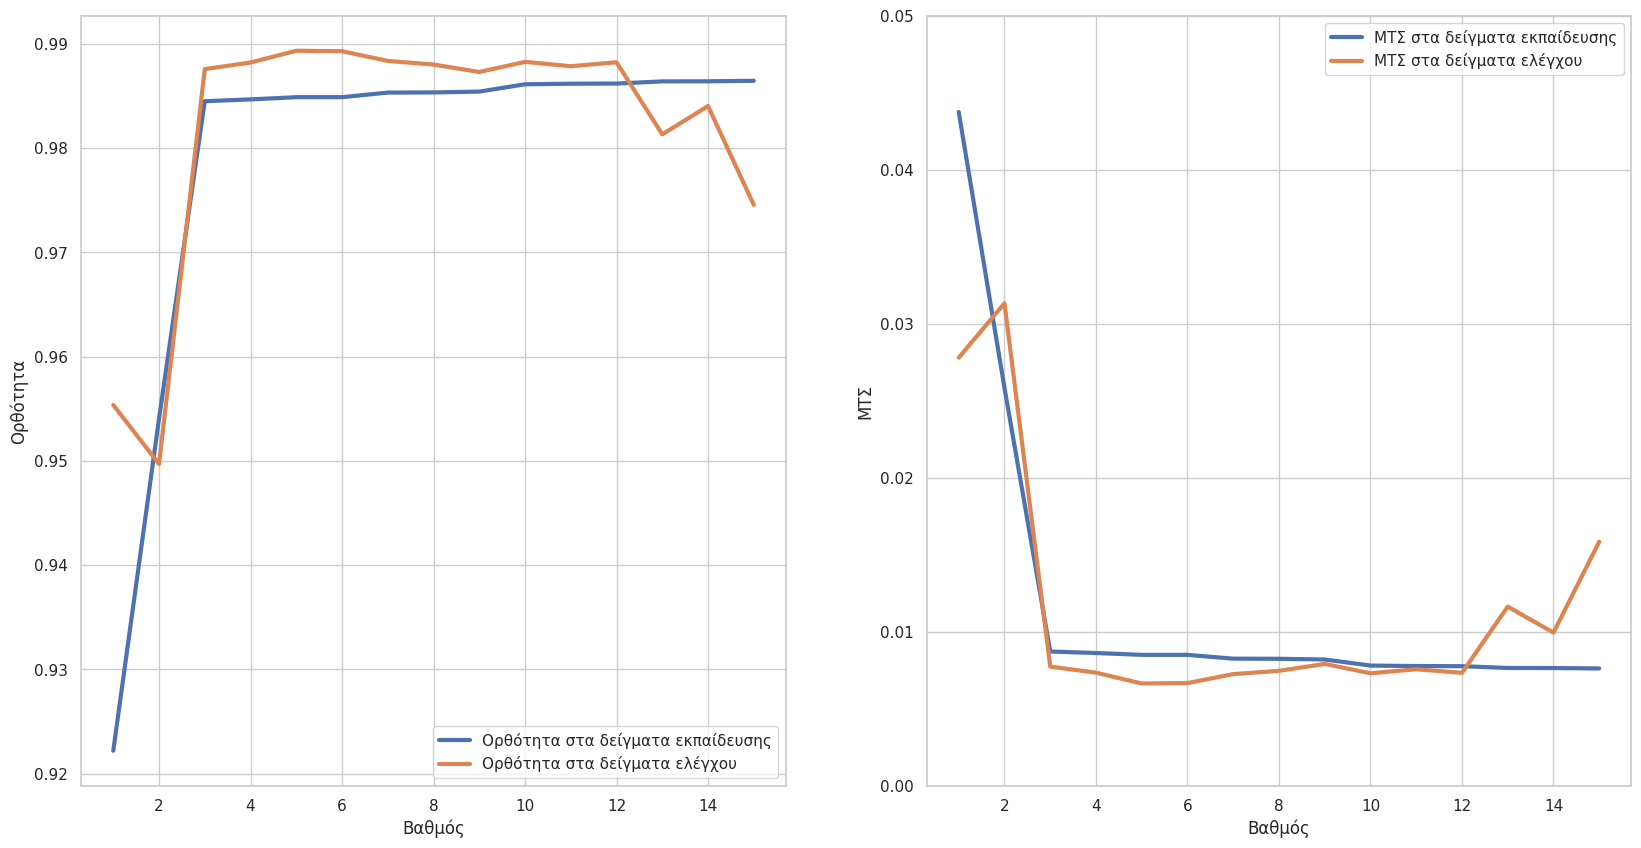

In [ ]:
degrees = np.linspace(1, 15, 15)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(degrees, Train_acc, label = 'Ορθότητα στα δείγματα εκπαίδευσης',
         linewidth = 3)
ax1.plot(degrees, Test_acc, label = 'Ορθότητα στα δείγματα ελέγχου',
         linewidth = 3)
ax1.legend()
ax1.set_xlabel('Βαθμός')
ax1.set_ylabel('Ορθότητα')
ax2.plot(degrees, Train_MSE, label = 'ΜΤΣ στα δείγματα εκπαίδευσης',
         linewidth = 3)
ax2.plot(degrees, Test_MSE, label = 'ΜΤΣ στα δείγματα ελέγχου', linewidth = 3)
plt.ylim(0, 0.05)
plt.legend()
ax2.set_xlabel('Βαθμός')
ax2.set_ylabel('ΜΤΣ')

Γίνεται εμφανές ότι, μέχρι και τον 5ο βαθμό, το ΜΤΣ στα δείγματα εκπαίδευσης και ελέγχου μειώνεται.

Από εκεί και πέρα όμως και όσο μεγαλώνει ο βαθμός, το ΜΤΣ συνεχίζει μια ελαφρώς πτωτική πορεία στα δείγματα εκπαίδευσης, αυξάνει όμως στα δείγματα ελέγχου, πράγμα που σημαίνει ότι το μοντέλο μας αρχίζει να εμφανίζει σημάδια υπερ-προσαρμογής.

Οπότε φαίνεται ότι τα δεδομένα του συγκεκριμένου προβλήματος προσεγγίζονται καλύτερα από πολυωνυμικό μοντέλο 5ου βαθμού. Ας το δούμε παρακάτω


In [ ]:
deg=5
pf = PolynomialFeatures(degree=deg)

x_train_p = pf.fit_transform(x_train)
x_test_p = pf.fit_transform(x_test)

pr = LinearRegression()
pr.fit(x_train_p, Y_train)

print('y = ',output_polynomial(pr.coef_, pr.intercept_))

compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)

y =  -10.08x^5 + 23.03x^4 + -10.93x^3 + -3.42x^2 + -0.40x^1 + 0.99
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.49%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 98.93%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0085
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0066


Σχεδιάζουμε  την υποκείμενη συνάρτηση, μαζί με την προσέγγιση που κάνει το μοντέλο μας

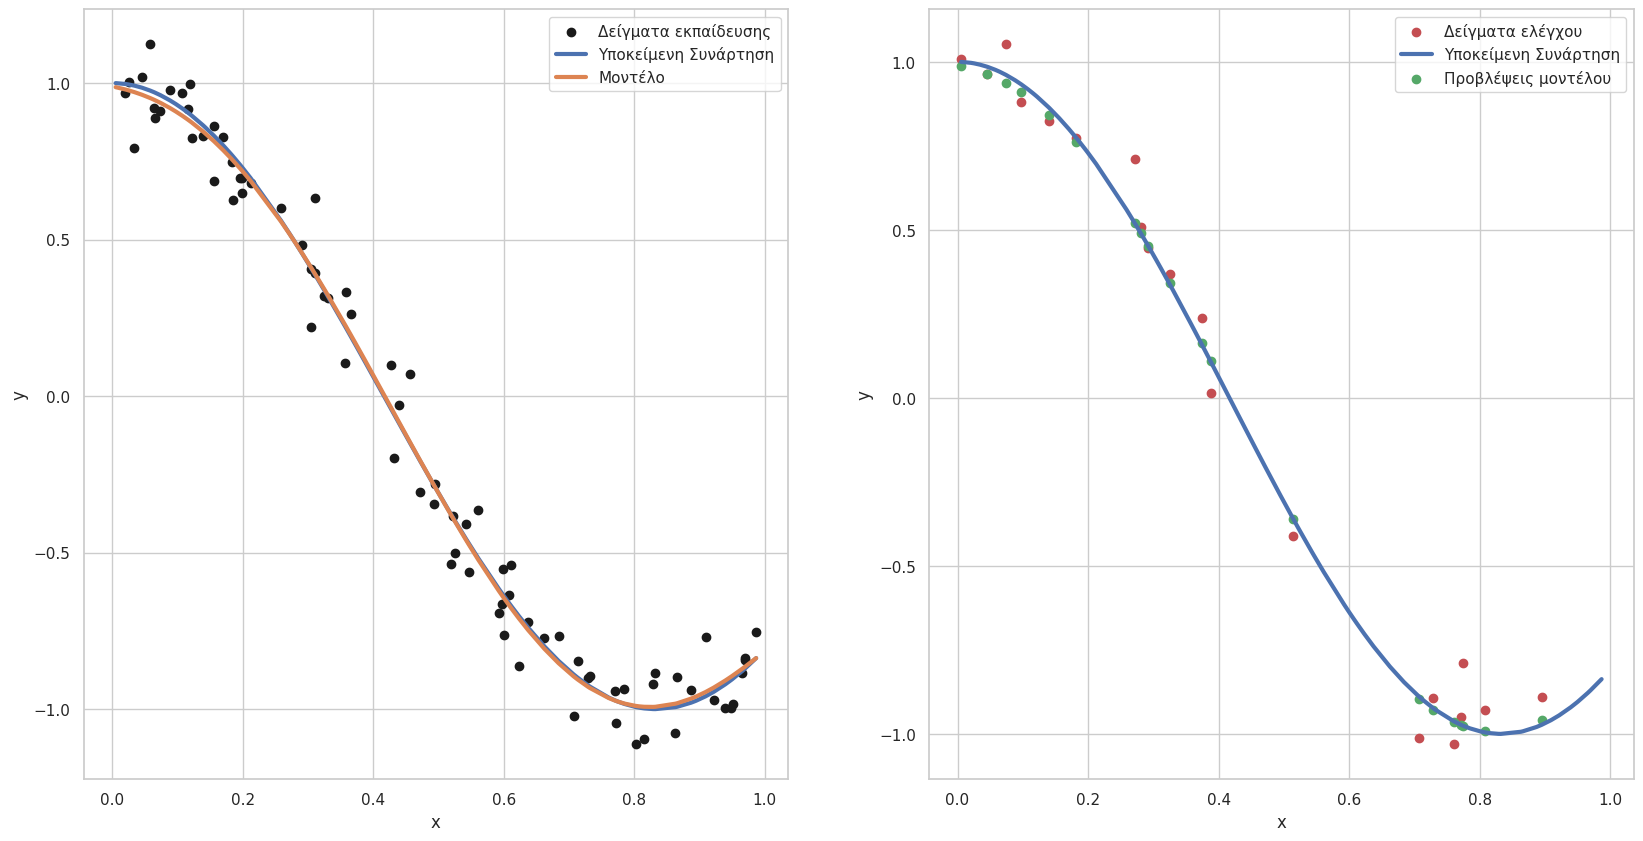

In [ ]:
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p), pr.predict(pf.fit_transform(x.reshape(-1,1))))

Παρατηρούμε δηλαδή ότι στη συγκεκριμένη περίπτωση το μοντέλο μας προσεγγίζει σχεδον ιδανικά την υποκείμενη συνάρτηση.

## Ομαλοποίηση

Στα περισσότερα πρακτικά προβλήματα, είναι πολύ δύσκολο να εφαρμόσουμε την τεχνική της εξαντλητικής αναζήτησης της βέλτιστης χωρητικότητας ενός μοντέλου που παρουσιάστηκε προηγουμένως.


Για το λόγο αυτό, καταφεύγουμε σε διάφορες τεχνικές ομαλοποίησης (regularization).

**Στόχος της ομαλοποίησης** είναι να **μειώσουμε τη διακύμανση του μοντέλου** **χωρίς** ωστόσο να **επηρεαστεί η μεροληψία του**

Πριν τις παρουσιάσουμε με πιο πολλές λεπτομέρειες, ας συγκρίνουμε τους συντελεστές του πολυωνύμου 5ου βαθμού (ιδανική λύση) με αυτές του 15ου βαθμού (υπερπροσαρμογή).

In [ ]:
pf5 = PolynomialFeatures(degree=5)
pf15 = PolynomialFeatures(degree=15)

x_train_5 = pf5.fit_transform(x_train)
x_test_5 = pf5.fit_transform(x_test)

x_train_15 = pf15.fit_transform(x_train)
x_test_15 = pf15.fit_transform(x_test)

pr5 = LinearRegression()
pr15 = LinearRegression()

pr5.fit(x_train_5, Y_train)
pr15.fit(x_train_15, Y_train)

print('Πολυώνυμο 5ου βαθμού:', output_polynomial(pr5.coef_, pr5.intercept_))
print('Πολυώνυμο 15ου βαθμού:', output_polynomial(pr15.coef_, pr15.intercept_))

Πολυώνυμο 5ου βαθμού: -10.08x^5 + 23.03x^4 + -10.93x^3 + -3.42x^2 + -0.40x^1 + 0.99
Πολυώνυμο 15ου βαθμού: -6958139.64x^15 + 51838379.02x^14 + -175009602.80x^13 + 354397646.75x^12 + -480185450.84x^11 + 459737329.70x^10 + -320139022.90x^9 + 164373893.74x^8 + -62396106.87x^7 + 17389454.41x^6 + -3496811.49x^5 + 491799.00x^4 + -45879.03x^3 + 2583.27x^2 + -74.83x^1 + 1.75


Παρατηρούμε ότι στη δεύτερη περίπτωση οι συντελεστές είναι δυσανάλογα μεγάλοι σε σύγκριση με το πεδίο ορισμού και το πεδίο τιμών του προβλήματος.

Ιδανικά θα θέλαμε να βρούμε ένα τρόπο που θα μας επιτρέπει να ξεκινάμε από ένα μοντέλο αυθαίρετα μεγάλης χωρητικότητας (και άρα να μη χρειάζεται να ψάχνουμε την ιδανική), το οποίο ωστόσο θα "ποινικοποιούσε" τις "εκτός πραγματικότητας" παραμέτρους του.

Στη συγκριμένη περίπτωση δηλαδή, θα θέλαμε να εξαφανίσει τους όρους άνω του 5ου βαθμού (πχ θέτοντας τους συγκεκριμένους συντελεστές στο μηδέν ή κοντά στο μηδέν) και μειώνοντας το εύρος των συντελεστών από τον 5ο βαθμό και κάτω.

Αυτή ακριβώς είναι και **η φιλοσοφία της ομαλοποίησης**: προσθέτει όρους ποινής στις παραμέτρους του μοντέλου (είτε ταξινόμησης είτε παλινδρόμησης), περιορίζοντας το εύρος των τιμών που μπορούν να πάρουν.

Πιο συγκεκριμένα, υποθέτουμε ότι έχουμε μοντέλο που έχει σύνολο υπερπαραμέτρων $\theta$ και το εκπαιδεύουμε σε
* δεδομένα εισόδου $\mathbf{X}$ ($m$ δείγματα, με $n$ χαρακτηριστικά το κάθε δείγμα),
* $m$ ετικέτες(τιμές) $\mathbf{y}$,

βελτιστοποιώντας την αντικειμενική συνάρτηση (συνάρτηση κόστους) $J(\theta; \mathbf{X,y})$.

Τότε, για το πρόβλημα της ομαλοποίησης ορίζουμε νέα αντικειμενική συνάρτηση $J'$

\begin{equation}
J'(\theta; \mathbf{X,y}) = J(\theta; \mathbf{X,y}) + \lambda\Omega(\theta)
\end{equation}

όπου $\lambda$ ο βαθμός της ομαλοποίησης (υπερ-παράμετρος της διαδικασίας) και $\Omega(\theta)$ μια μετρική του εύρους των παραμέτρων του μοντέλου.

Έτσι πλέον βελτιστοποιούμε τη νέα συνάρτηση $J'$ με τη μέθοδο εκπαίδευσης που έχουμε επιλέξει (πχ στοχαστική κατάβαση κλίσης).

### Κανονικοποίηση L2 (ή Παλινδρόμηση Ridge)

Στην κανονικοποίηση L2 (ή παλινδρόμηση Ridge) θέτουμε ως όρο ποινής το τετράγωνο των παραμέτρων του μοντέλου, δηλαδή
\begin{equation}
\Omega(\theta) = \frac{1}{2}||\theta||_2^2=\frac{1}{2}\theta^{\top}\theta
\end{equation}
Έτσι η κανονικοποιημένη συνάρτηση κόστους γίνεται
\begin{equation}
J'(\theta; \mathbf{X,y}) = J(\theta; \mathbf{X,y}) + \frac{\lambda}{2}\theta^{\top}\theta
\end{equation}
της οποίας η κλίση υπολογίζεται ως εξής
\begin{equation}
\nabla_\theta J'(\theta; \mathbf{X,y}) = \nabla_\theta J(\theta; \mathbf{X,y}) + \lambda\theta
\end{equation}

Στο παράδειγμα που εξετάζουμε η συνάρτηση κόστους είναι το ΜΤΣ μεταξύ εξόδου και πρόβλεψης, οπότε αν ορίσουμε το μοντέλο μας ως εξής
\begin{equation}
f_a(x)=\sum\limits_{j=0}^{n} a_j*x^j
\end{equation}
τότε η συνάρτηση βελτιστοποίησης για τα $m$ δείγματα γίνεται
\begin{equation}
J'(\alpha)=\frac{1}{m}\left[ \frac{1}{2}\sum\limits_{i=1}^{m} \left( f_\alpha(x)^{(i)}- y^{(i)}\right)^2 + \frac{1}{2}\lambda\sum_{j=1}^{n}\alpha_j^2 \right]
\end{equation}
και η κλίση της
\begin{equation}
\nabla_\alpha J'(\alpha)=\frac{1}{m}\left[ \sum\limits_{i=1}^{m} \left( f_\alpha(x)^{(i)}- y^{(i)}\right)\nabla_\alpha f_\alpha(x)^{(i)} + \lambda\sum_{j=1}^{n}\alpha_j \right]
\end{equation}
Αυτό σημαίνει ότι ο κάθε όρος $\alpha_j$ του πολυωνύμου τη χρονική στιγμή $t+1$ ενημερώνεται ως εξής
\begin{equation}
\alpha_j^{(t+1)} \leftarrow \alpha_j^{(t)} - \eta\alpha_j^{(t)}\frac{1}{m}\left[ \sum\limits_{i=1}^{m} \left( f_\alpha(x)^{(i)}- y^{(i)}\right)(x^j)^{(i)} + \lambda \right]
\end{equation}
όπου $\eta$ ο ρυθμός μάθησης (παίρνει τιμές στο $[0,1]$). Η τελευταία σχέση απλοποιείται περαιτέρω σε
\begin{equation}
\alpha_j^{(t+1)} \leftarrow \left(1 - \frac{\eta\lambda}{m}\right)\alpha_j^{(t)} - \frac{\eta}{m}\sum\limits_{i=1}^{m} \left( f_\alpha(x)^{(i)}- y^{(i)}\right)(x^j)^{(i)}
\end{equation}
Από τη στιγμή που $\eta \in [0,1]$ είναι εμφανές πως ισχύει
\begin{equation}
1 - \frac{\eta\lambda}{m}<1
\end{equation}
οπότε σε κάθε επανάληψη το εύρος των όρων του πολυωνύμου φθίνει. Επίσης $\frac{\eta}{m} << 1$, ($m$ το πλήθος των δειγμάτων), οπότε ο δεύτερος όρος δεν παίζει κάποιο ουσιαστικό ρόλο στη διαμόρφωση της τιμής των $\alpha_j$

#### Βαθμός ομαλοποίησης (παράμετρος $\lambda$)

Για να μπορέσουμε να εκτιμήσουμε τον ρόλο που παίζει ο βαθμός της ομαλοποίησης (παράμετρος $\lambda$) θα ξεκινήσουμε από το μοντέλο του 15ου βαθμού και θα εξετάσουμε την επίδραση διαφόρων τιμών για το $\lambda$.

In [ ]:
pf = PolynomialFeatures(degree=15)
x_train_p = pf.fit_transform(x_train)
x_test_p = pf.fit_transform(x_test)


Σε αυτή την περίπτωση θα πρέπει να χρησιμοποιήσουμε την κλάση *Ridge* του submodule linear_model του scikit learn, η οποία παίρνει ως παράμετρο το βαθμό ομαλοποίησης. Ας ξεκινήσουμε με $\lambda = 0$

y =  -6958139.64x^15 + 51838379.02x^14 + -175009602.80x^13 + 354397646.75x^12 + -480185450.84x^11 + 459737329.70x^10 + -320139022.90x^9 + 164373893.74x^8 + -62396106.87x^7 + 17389454.41x^6 + -3496811.49x^5 + 491799.00x^4 + -45879.03x^3 + 2583.27x^2 + -74.83x^1 + 1.75
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.65%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 97.46%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0076
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0158


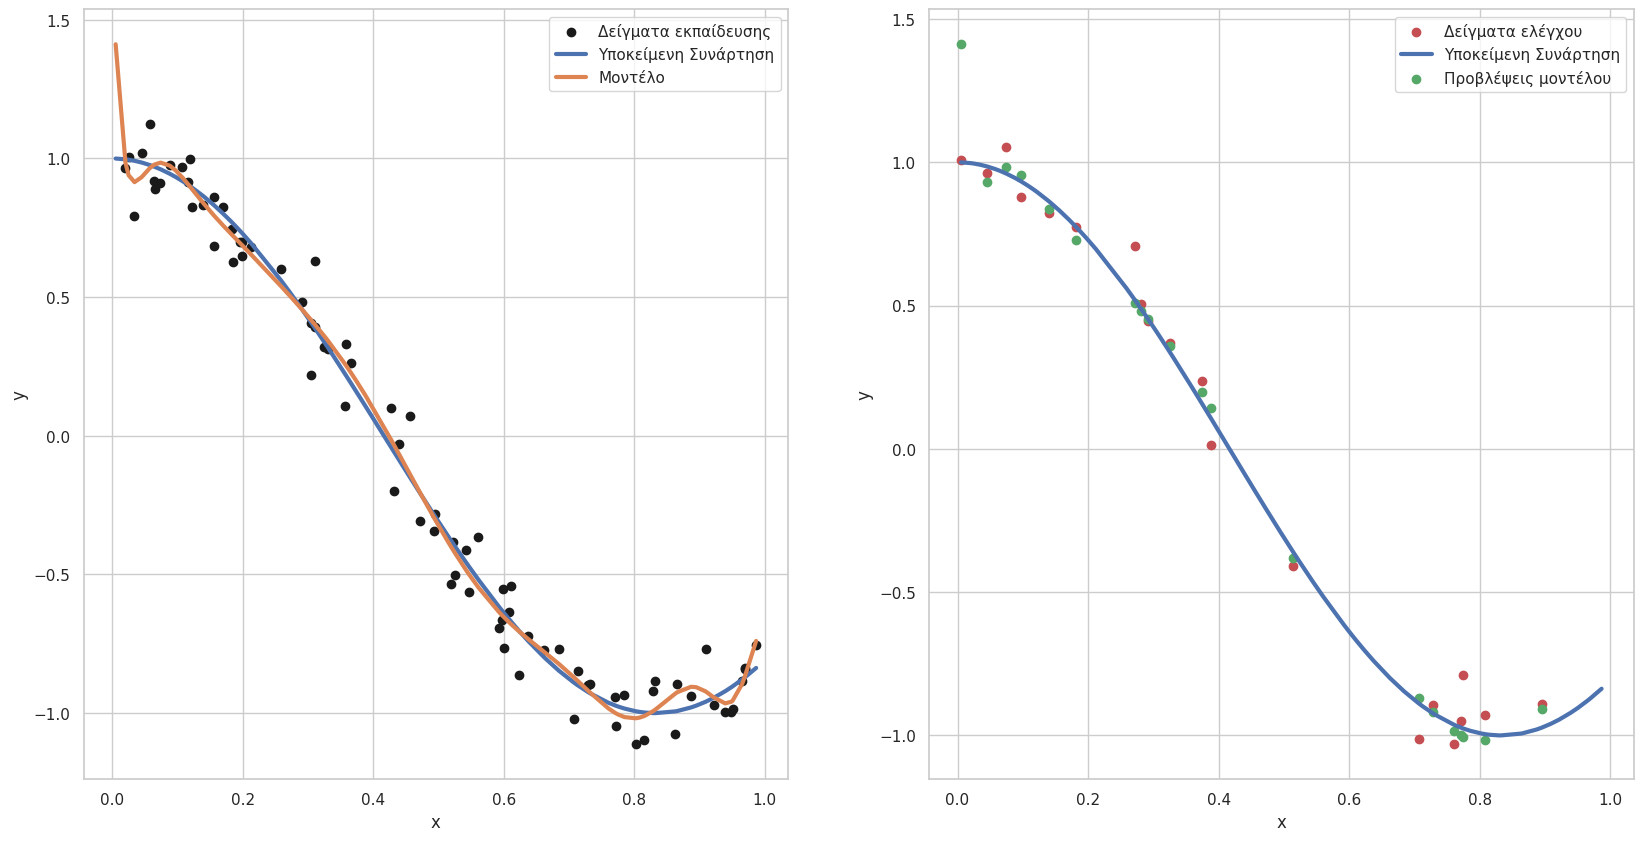

In [ ]:
pr = Ridge(0.0)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p), pr.predict(pf.fit_transform(x.reshape(-1,1))))

Όπως αναμενόταν, μηδενικός βαθμός ομαλοποίησης σημαίνει ότι δεν έχουμε καθόλου ομαλοποίηση, οπότε η συμπεριφορά του μοντέλου είναι ίδια με προηγουμένως. Ας προσθέσουμε ένα μικρό βαθμό ομαλοποίησης ($\lambda = 0.5$)

y =  0.03x^15 + 0.06x^14 + 0.08x^13 + 0.11x^12 + 0.15x^11 + 0.18x^10 + 0.21x^9 + 0.23x^8 + 0.24x^7 + 0.22x^6 + 0.13x^5 + -0.05x^4 + -0.41x^3 + -1.03x^2 + -1.74x^1 + 0.99
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 96.69%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 97.14%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0186
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0178


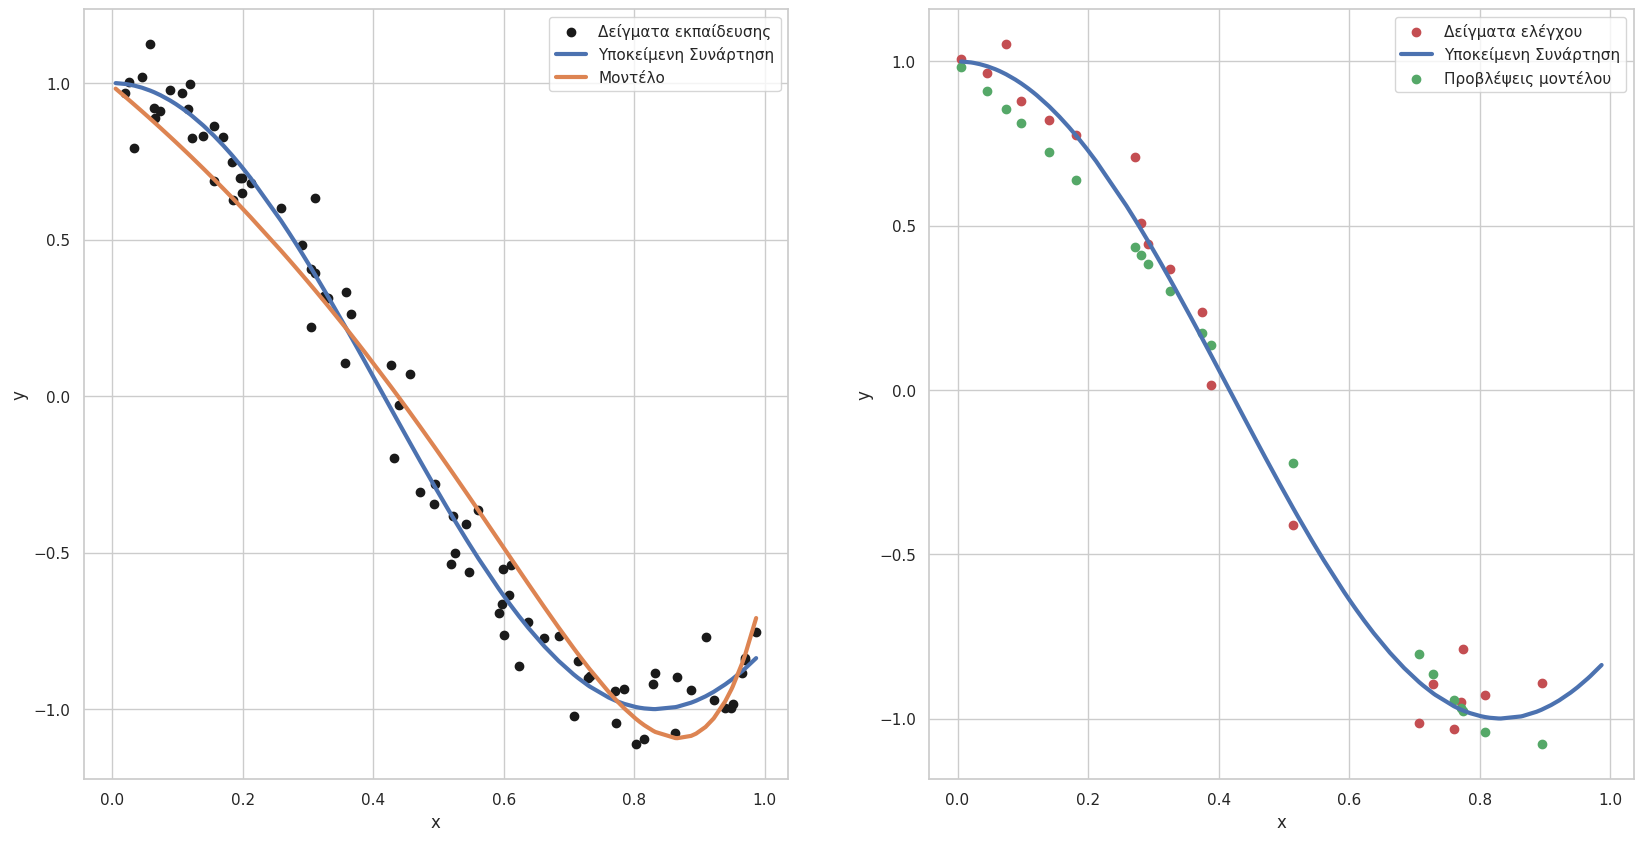

In [ ]:
pr = Ridge(0.5)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Εδώ φαίνεται πως το μοντέλο 15ου βαθμού με L2 ομαλοποίηση προσεγγίζει αρκέτα πιο καλά των υποκείμενη συνάρτηση. Επίσης, αν συγκρίνουμε τους όρους του με τους αντίστοιχους του μοντέλου χωρίς ομαλοποίηση, παρατηρούμε ότι τα εύρη τους είναι αρκετά πιο περιορισμένα, ειδικά στους υψηλούς βαθμούς.

Ας αυξήσουμε και άλλο το βαθμό ομαλοποίησης, κάνοντάς τον 5

y =  0.10x^15 + 0.10x^14 + 0.10x^13 + 0.09x^12 + 0.09x^11 + 0.08x^10 + 0.06x^9 + 0.04x^8 + 0.01x^7 + -0.03x^6 + -0.11x^5 + -0.21x^4 + -0.38x^3 + -0.62x^2 + -0.87x^1 + 0.61
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 83.39%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 84.52%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0934
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0964


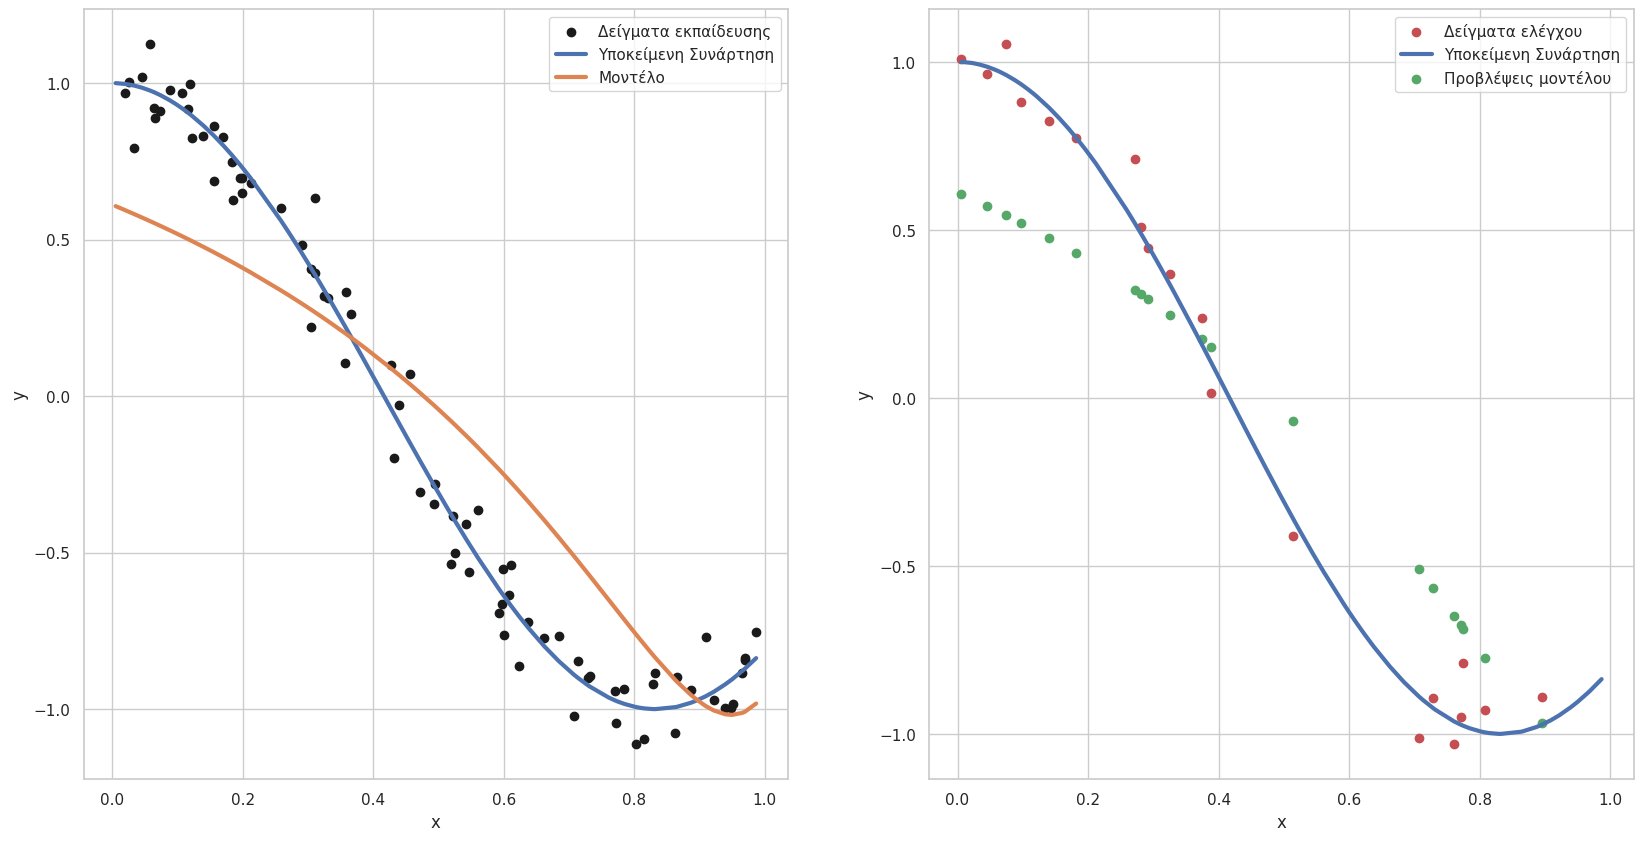

In [ ]:
pr = Ridge(5)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Παρατηρούμε ότι τον έχουμε μεγαλώσει αρκετά, μειώνοντας τη χωρητικότητα του μοντέλου παραπάνω απ' ότι χρειαζόταν, καταλήγοντας συνεπώς να έχουμε υπό-προσαρμογή.

Αν συνεχίζαμε να αυξήσουμε το $\lambda$, αυτό θα είχε ως συνέπεια οι περισσότεροι όροι του πολυωνύμου να τείνουν προς το μηδέν (σύμφωνα και με την ανάλυση που έχουμε κάνει παραπάνω) και έτσι το μοντέλο μας να γίνει σχεδόν μια ευθεία γραμμή, παράλληλη στον άξονα των $x$. Ας το δούμε αυτό το φαινόμενο για $\lambda = 10000$

y =  -0.00x^15 + -0.00x^14 + -0.00x^13 + -0.00x^12 + -0.00x^11 + -0.00x^10 + -0.00x^9 + -0.00x^8 + -0.00x^7 + -0.00x^6 + -0.00x^5 + -0.00x^4 + -0.00x^3 + -0.00x^2 + -0.00x^1 + -0.10
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 0.60%
Ορθότητα στο σύνολο δεδομένων ελέγχου: -3.17%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.5588
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.6424


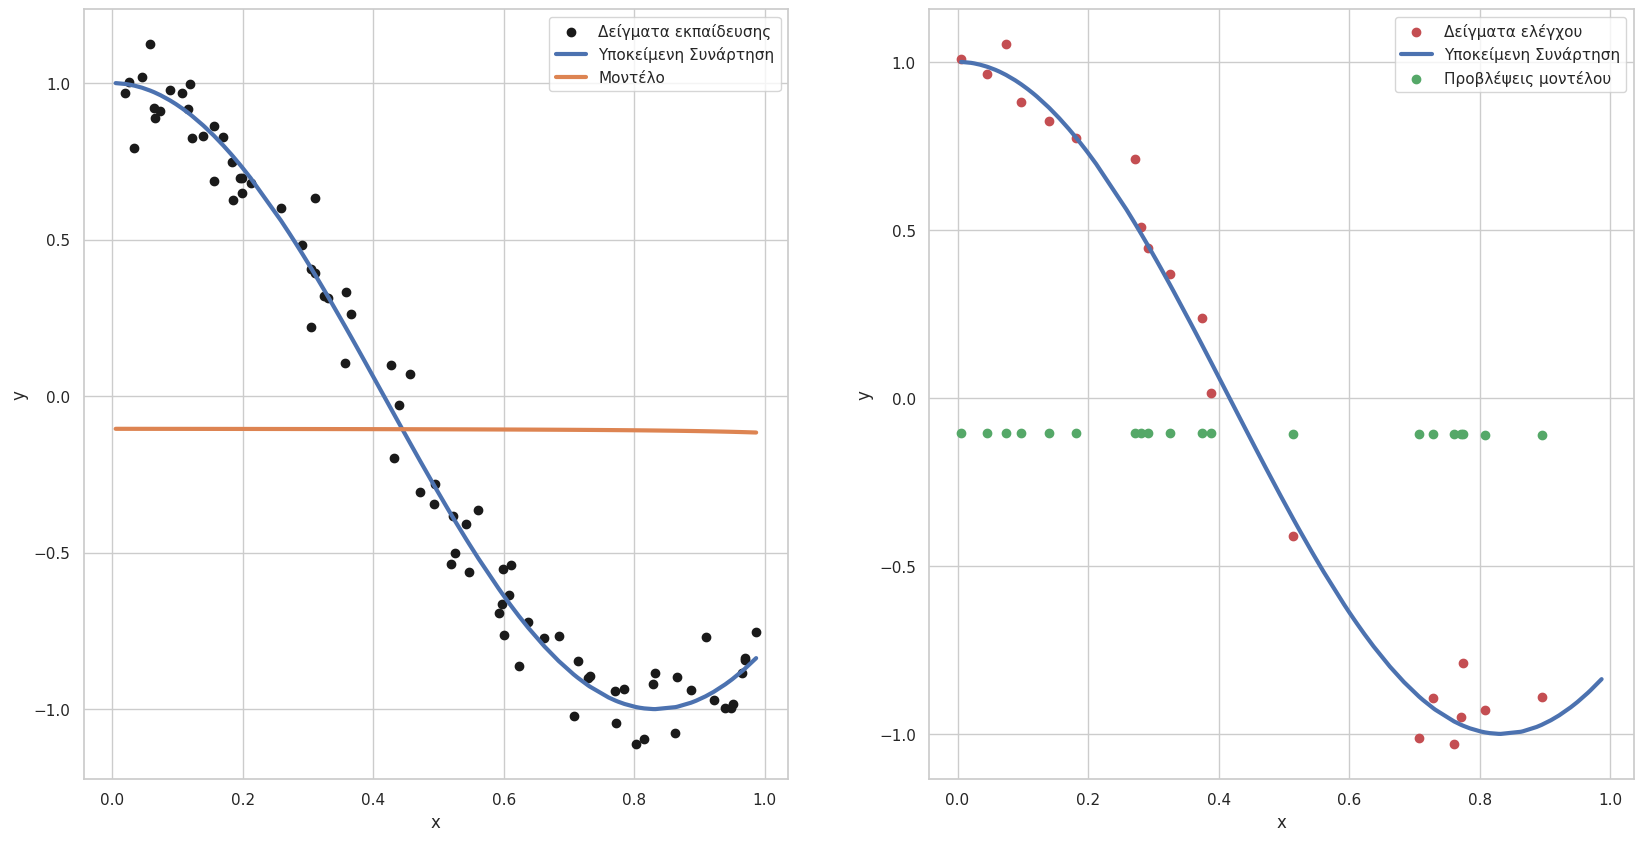

In [ ]:
pr = Ridge(10000)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Συνεπώς, πρέπει να κινηθούμε στην αντίθετη κατεύθυνση και να ψάξουμε τη βέλτιστη τιμή του $\lambda$ στο $(0, 0.5)$ για το συγκεκριμένο πρόβλημα. Ας δοκιμάσουμε για $\lambda = 0.01$

y =  -0.17x^15 + -0.25x^14 + -0.28x^13 + -0.27x^12 + -0.20x^11 + -0.06x^10 + 0.15x^9 + 0.42x^8 + 0.72x^7 + 0.96x^6 + 1.00x^5 + 0.58x^4 + -0.61x^3 + -2.39x^2 + -1.55x^1 + 1.08
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.32%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 98.57%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0094
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0089


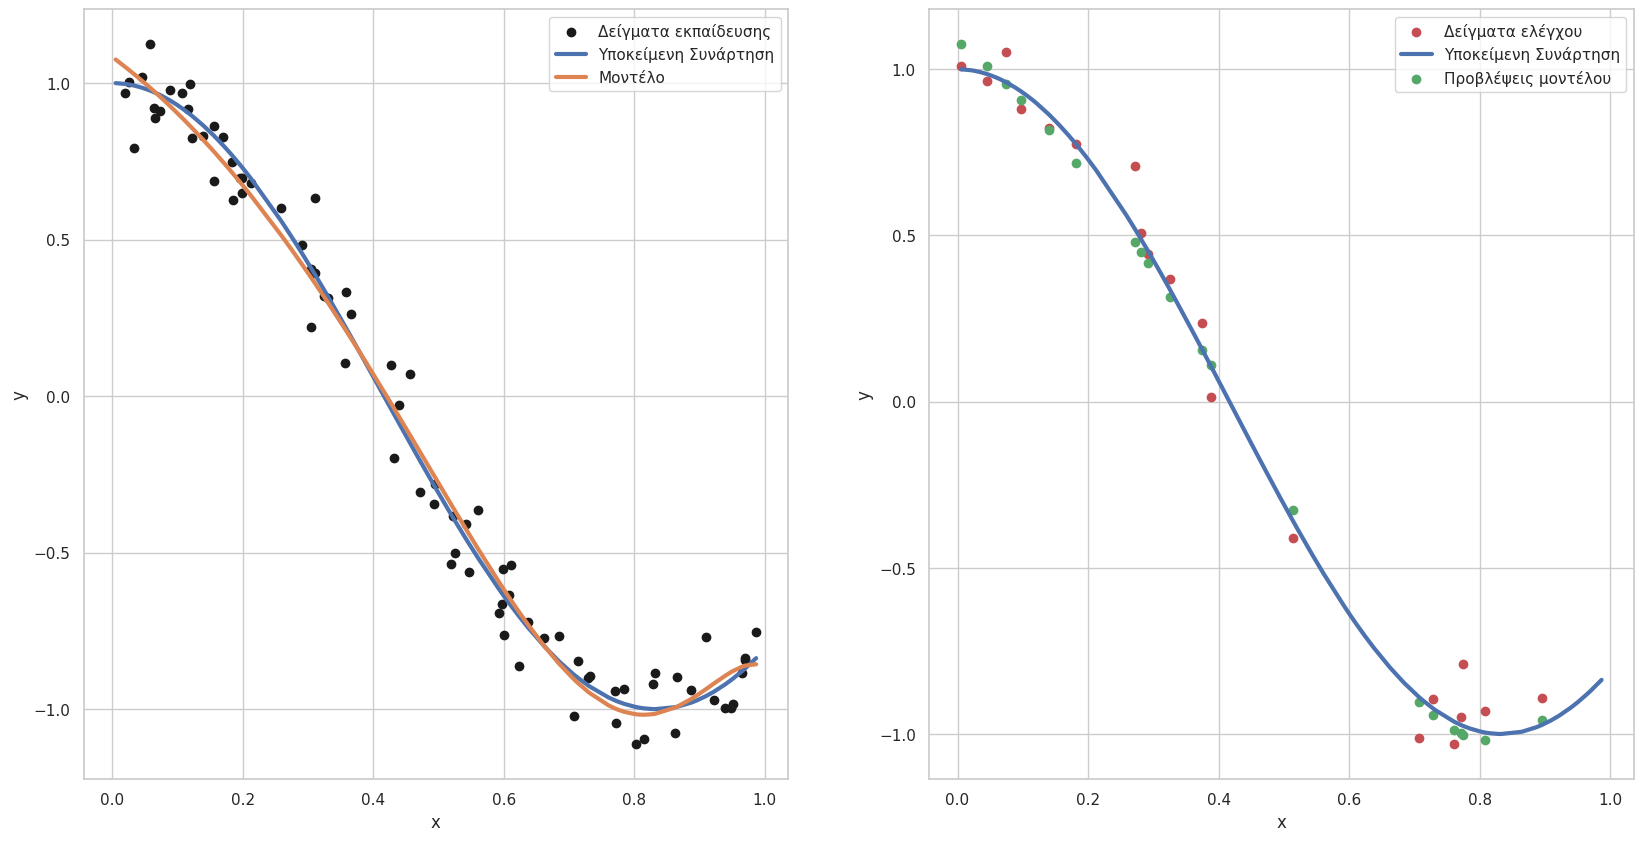

In [ ]:
pr = Ridge(0.01)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Παρατηρούμε ότι το αποτέλεσμα είναι πολύ καλύτερο και αυτό φαίνεται τόσο στις μετρικές όσο και στην ταύτιση μεταξύ υποκείμενη συνάρτησης και μοντέλου στις γραφικές παραστάσεις. Και σε αυτή την περίπτωση, οι όροι μεγάλου βαθμού του πολυωνύμου έχουν τιμές κοντά στο μηδέν, σε αντίθεση με τους πιο χαμηλούς όρους που έχουν μεγαλύτερες (κατ' απόλυτη τιμή).

Μπορείτε να βελτιστοποιήσετε ακόμα περισσότερο το μοντέλο, βρίσκοντας μια ακόμα καλύτερη τιμή για το $\lambda$;

### Κανονικοποίηση L1 (ή Παλινδρόμηση Lasso)

Στην κανονικοποίηση L1 (ή παλινδρόμηση Lasso) θέτουμε ως όρο ποινής την απόλυτη τιμή των παραμέτρων του μοντέλου, δηλαδή
\begin{equation}
\Omega(\theta) = ||\theta||_1
\end{equation}
Έτσι η κανονικοποιημένη συνάρτηση κόστους γίνεται
\begin{equation}
J'(\theta; \mathbf{X,y}) = J(\theta; \mathbf{X,y}) + \lambda||\theta||_1
\end{equation}
της οποίας η κλίση υπολογίζεται ως εξής
\begin{equation}
\nabla_\theta J'(\theta; \mathbf{X,y}) = \nabla_\theta J(\theta; \mathbf{X,y}) + \lambda sgn(\theta)
\end{equation}
όπου *sgn()* η συνάρτηση προσίμου.

Στο παράδειγμα που εξετάζουμε η συνάρτηση η συνάρτηση βελτιστοποίησης για τα $m$ δείγματα γίνεται
\begin{equation}
J'(\alpha)=\frac{1}{m}\left[ \frac{1}{2}\sum\limits_{i=1}^{m} \left( f_\alpha(x)^{(i)}- y^{(i)}\right)^2 + \lambda\sum_{j=1}^{n}||\alpha_j|| \right]
\end{equation}
και η κλίση της
\begin{equation}
\nabla_\alpha J'(\alpha)=\frac{1}{m}\left[ \sum\limits_{i=1}^{m} \left( f_\alpha(x)^{(i)}- y^{(i)}\right)\nabla_\alpha f_\alpha(x)^{(i)} + \lambda\sum_{j=1}^{n}sgn(\alpha_j) \right]
\end{equation}
Αυτό σημαίνει ότι ο κάθε όρος $\alpha_j$ του πολυωνύμου τη χρονική στιγμή $t+1$ ενημερώνεται ως εξής
\begin{equation}
\alpha_j^{(t+1)} \leftarrow \left(1 - \frac{\eta}{m}\sum\limits_{i=1}^{m} \left( f_\alpha(x)^{(i)}- y^{(i)}\right)(x^j)^{(i)}\right)\alpha_j^{(t)} - \lambda sgn(\alpha_j)
\end{equation}
Από τη στιγμή που $\frac{\eta}{m} << 1$, ο παραπάνω κανόνας απλοποιείται σε
\begin{equation}
\alpha_j^{(t+1)} \leftarrow \alpha_j^{(t)} - \lambda sgn(\alpha_j)
\end{equation}
οπότε αναλόγως του προσίμου, το $\alpha_j$ σε κάθε επανάληψη αυξάνει ή μειώνεται κατά $\lambda$. Αυτό σημαίνει πως, σε αντίθεση με την προηγούμενη περίπτωση, κάποιοι (ή όλοι οι όροι) μπορούν να γίνουν μηδέν (αντί να το προσεγγίζουν). Επίσης, σε αυτή την περίπτωση η μεταβολή των όρων είναι βηματική και άρα πιο "απότομη" σε σύγκριση με την αναλογική μείωση της L2 κανονικοποίησης.

#### Βαθμός ομαλοποίησης (παράμετρος $\lambda$)

Και σε αυτή την περίπτωση για να εκτιμήσουμε τον ρόλο που παίζει ο βαθμός της ομαλοποίσης στη χωρητικότητα του μοντέλου, θα εξετάσουμε διάφορες τιμές του $\lambda$. Θα χρησιμοποιήσουμε την κλάση *Lasso* του submodule linear_model του scikit learn, η οποία παίρνει ως παράμετρο το βαθμό ομαλοποίησης. Ας ξεκινήσουμε με $\lambda = 0.1$

y =  -0.00x^15 + -0.00x^14 + -0.00x^13 + -0.00x^12 + -0.00x^11 + -0.00x^10 + -0.00x^9 + -0.00x^8 + -0.00x^7 + -0.00x^6 + -0.00x^5 + -0.00x^4 + -0.00x^3 + -0.00x^2 + -1.29x^1 + 0.52
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 71.99%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 69.60%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.1575
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.1893


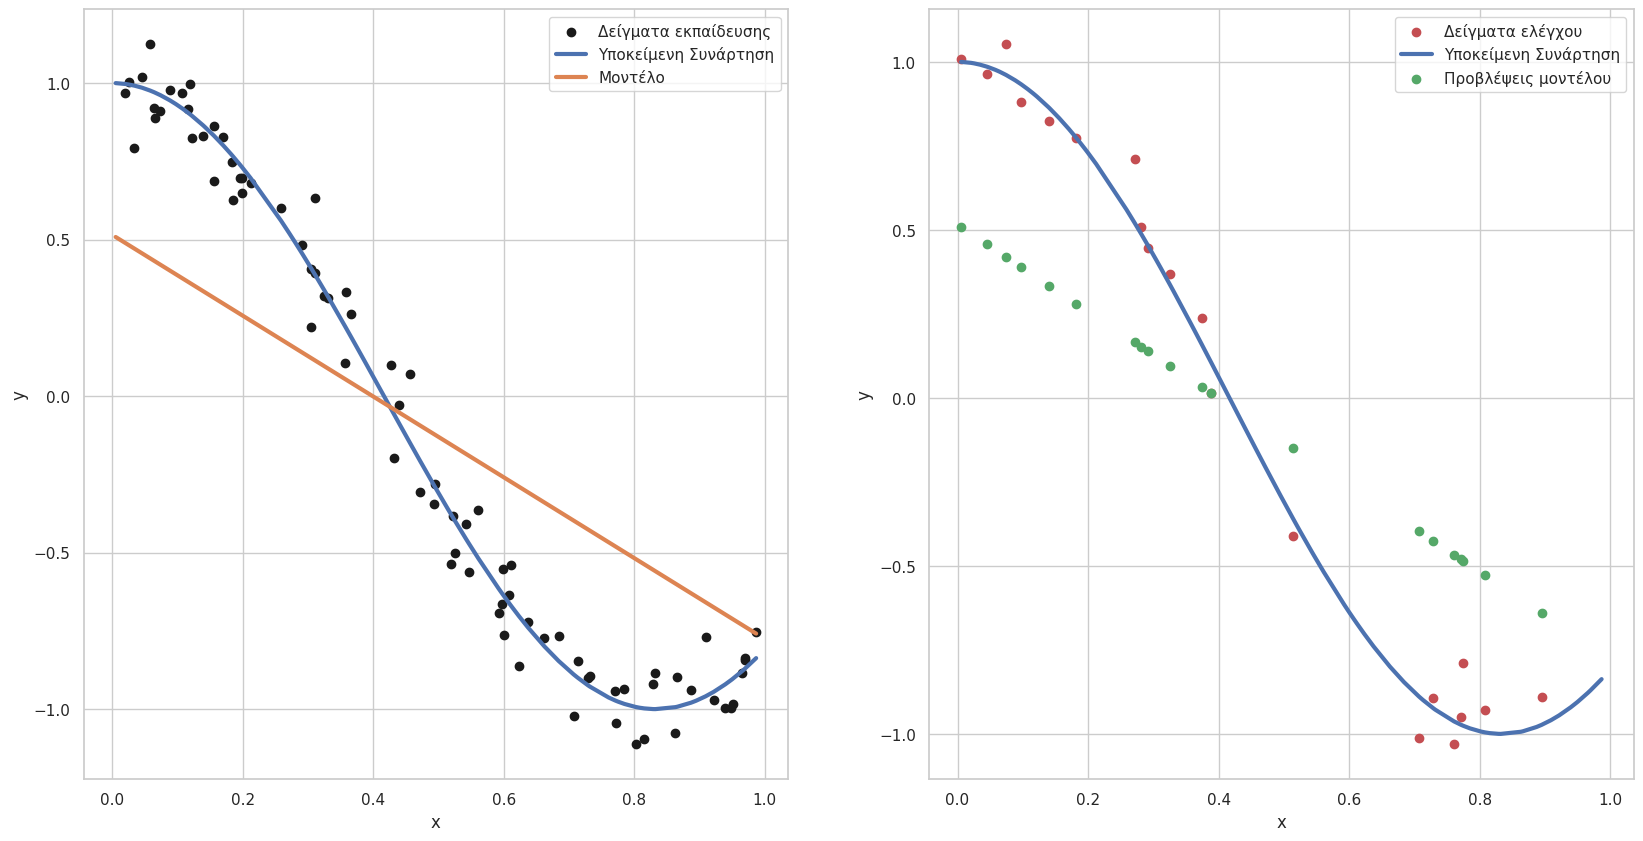

In [ ]:
pr = Lasso(0.1)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Βλέπουμε ότι ακόμα και για μια μικρή τιμή του συντελεστή ομαλοποίησης, η χωρηστικότητα του μοντέλου μειώνεται πάρα πολύ με όλους του σχεδόν τους όρους να γίνονται μηδενικοί. Αυτό σημαίνει ότι έχουμε οδηγηθεί σε λύση υπό-προσαρμογής και συνεπώς θα πρέπει να μειώσουμε το συντελεστή ομαλοποίησης προκειμένου να αυξήσουμε τη χωρητικότητα.

Ας δοκιμάσουμε για $\lambda = 0.001$

y =  0.00x^15 + 0.00x^14 + 0.00x^13 + 0.00x^12 + 0.00x^11 + 0.00x^10 + 0.00x^9 + 0.00x^8 + 0.53x^7 + 0.92x^6 + 0.00x^5 + 0.00x^4 + -0.00x^3 + -0.85x^2 + -2.47x^1 + 1.16
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 97.86%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 97.85%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0120
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0134


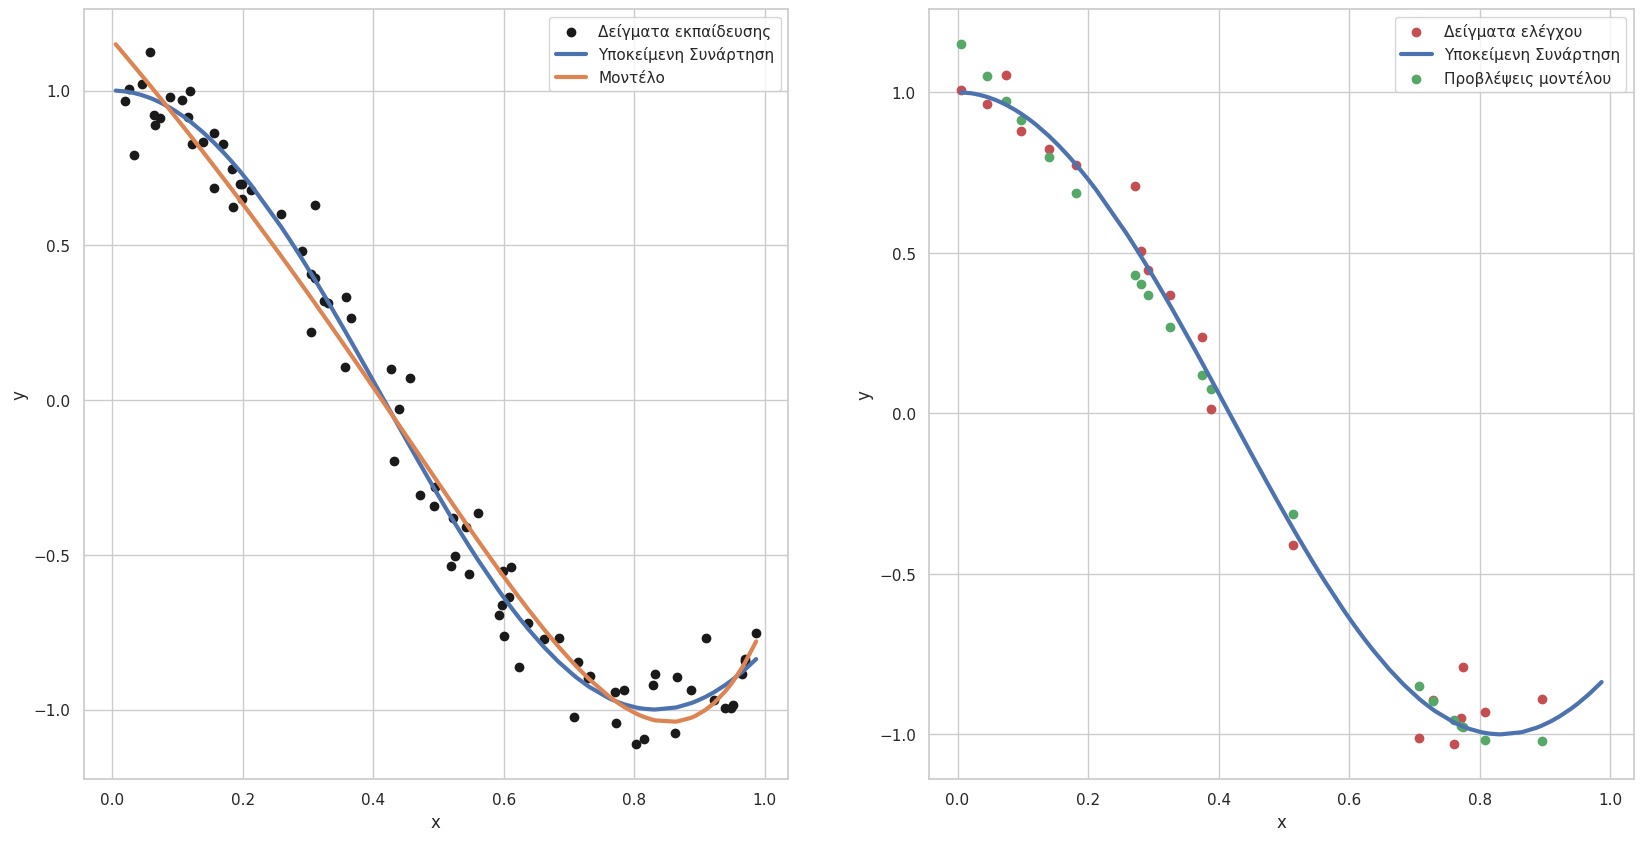

In [ ]:
pr = Lasso(0.001)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Η προσέγγιση είναι πιο καλή, αλλά πρέπει να μειώσουμε το $\lambda$ ακόμα περισσότερο

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.380e-02, tolerance: 4.498e-03
  model = cd_fast.enet_coordinate_descent(


y =  -0.20x^15 + -0.26x^14 + -0.06x^13 + -0.00x^12 + -0.00x^11 + -0.00x^10 + -0.00x^9 + 0.00x^8 + 0.00x^7 + 0.41x^6 + 1.32x^5 + 1.86x^4 + 0.00x^3 + -3.92x^2 + -1.04x^1 + 1.05
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.40%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 98.70%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0090
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0081


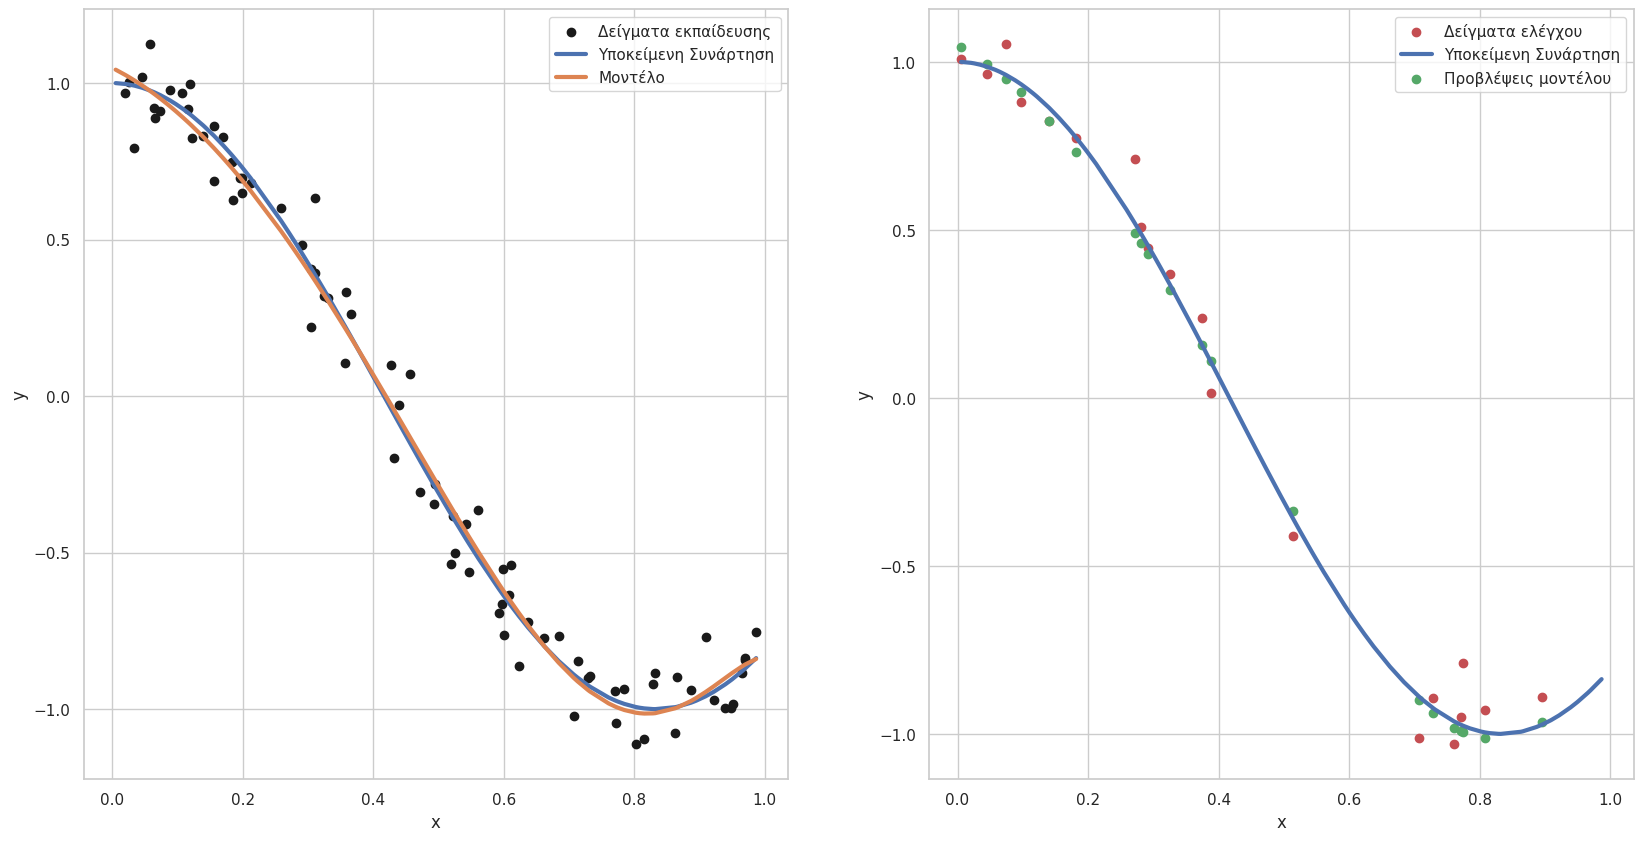

In [ ]:
pr = Lasso(0.0001)
pr.fit(x_train_p, Y_train)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Εδώ η προσαρμογή φαίνεται ακόμα καλύτερη. Ας δούμε αναλυτικότερα τους όρους του μοντέλου.

In [ ]:
print(pr.coef_)

[ 0.         -1.03771335 -3.91874167  0.          1.85604555  1.32021306
  0.40996277  0.          0.         -0.         -0.         -0.
 -0.         -0.05719389 -0.25632199 -0.19711607]


Παρατηρούμε ότι όντως κάποιοι όροι του μοντέλου έχουν πάρει μηδενική τιμή.

Αυτή τη συμπεριφορά μπορούμε να τη θεωρήσουμε ως αντίστοιχη της *επιλογής χαρακτηριστικών* (feature selection), όπου έχουν παραληφθεί όλοι εκείνοι οι όροι που δεν συνεισφέρουν στο μοντέλο.

## Επιλογή βέλτιστου βαθμού ομαλοποίησης

Όπως αναφέρθηκε και παραπάνω, ο βαθμός ομαλοποίησης αποτελεί υπερπαράμετρο της διαδικασίας, όποτε για να βρεθεί η βέλτιστη τιμή του ακολουθούμε τις τεχνικές εύρεσης βέλτιστων τιμών των υπερ-παραμέτρων με χρήση διασταυρούμενης επικύρωσης (cross validation) που γνωρίζουμε από την επιβλεπόμενη μάθηση.

Αυτό που χρειάζεται να κάνουμε δηλαδή είναι να ορίσουμε ένα εύρος αναζήτησης για το $\lambda$ καθώς και το πλήθος των πτυχωμάτων (folds). Μπορούμε επίσης να χρησιμοποιήσουμε τις κλάσεις *RidgeCV* και *LassoCV* του submodule linear_model του scikit-learn που κάνουν ακριβώς αυτή τη δουλειά για μας. Ας δούμε, για παράδειγμα, την RidgeCV



Βέλτιστο λ= 0.0005
y =  1.71x^15 + 0.59x^14 + -0.31x^13 + -0.96x^12 + -1.31x^11 + -1.31x^10 + -0.95x^9 + -0.23x^8 + 0.77x^7 + 1.81x^6 + 2.43x^5 + 1.91x^4 + -0.61x^3 + -4.77x^2 + -0.53x^1 + 1.01
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.50%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 98.92%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0084
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0067


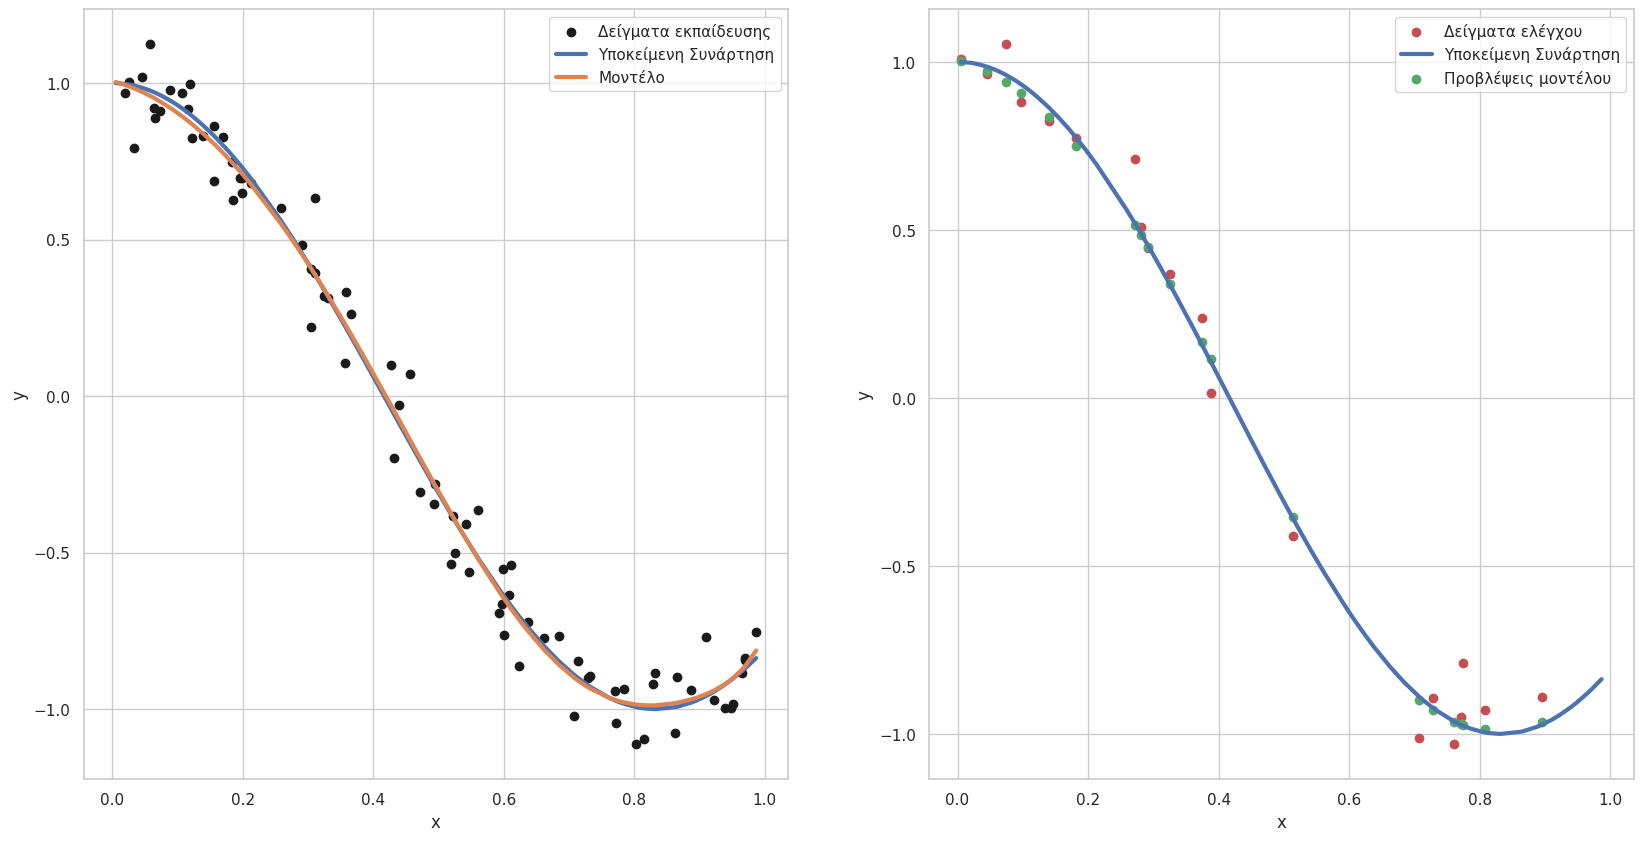

In [ ]:
pr = RidgeCV(alphas=[0.0005, 0.001, 0.01, 0.1, 1], cv=5)
pr.fit(x_train_p, Y_train)

print('Βέλτιστο λ=', pr.alpha_)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Η βέλτιστη τιμή είναι $\lambda = 0.0005$. Ας ψάξουμε γύρω από αυτές τις τιμές για να δούμε αν θα βρούμε κάτι καλύτερο

Βέλτιστο λ= 0.0002
y =  2.34x^15 + 0.75x^14 + -0.47x^13 + -1.28x^12 + -1.66x^11 + -1.60x^10 + -1.09x^9 + -0.19x^8 + 0.96x^7 + 2.05x^6 + 2.59x^5 + 1.90x^4 + -0.63x^3 + -4.98x^2 + -0.43x^1 + 1.00
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 98.51%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 98.95%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0084
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0065


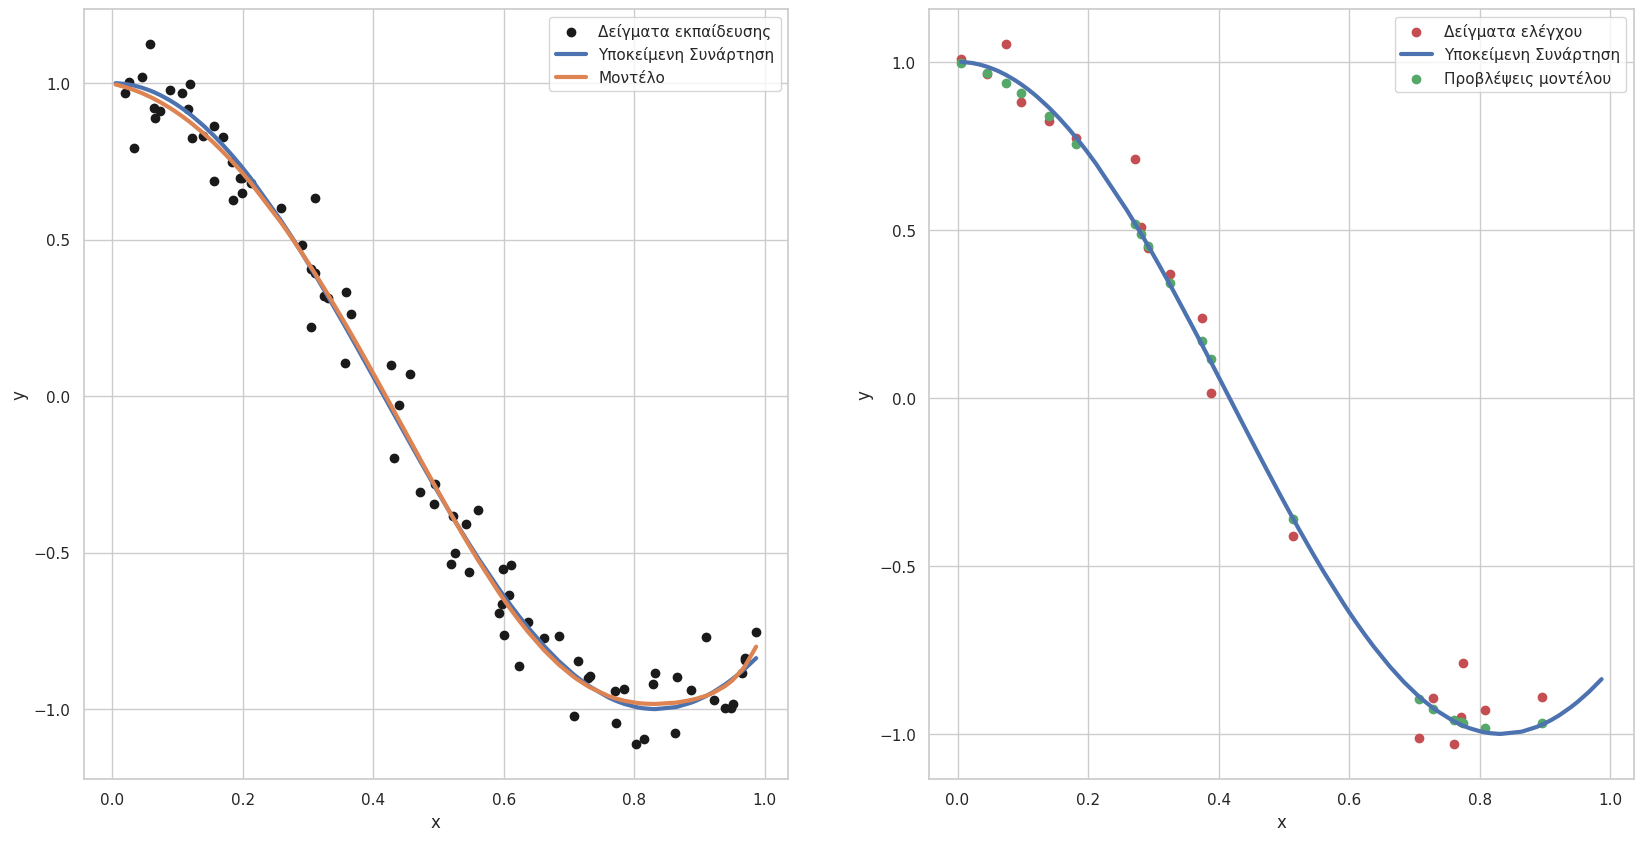

In [ ]:
pr = RidgeCV(alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005], cv=5)
pr.fit(x_train_p, Y_train)

print('Βέλτιστο λ=', pr.alpha_)

print('y = ', output_polynomial(pr.coef_, pr.intercept_))
compute_metrics(pr, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, pr.predict(x_test_p),
              pr.predict(pf.fit_transform(x.reshape(-1,1))))

Το $\lambda = 0.0002$ δίνει ακόμα καλύτερα αποτελέσματα. Με παρόμοιο τρόπο μπορούμε να κινηθούμε και για την L2 κανονικοποίηση (LassoCV)

## Πρόωρος Τερματισμός

Ο πρόωρος τερματισμός (early stopping) είναι μια διαδεδομένη τεχνική ομαλοποίησης, κυρίως λόγω της απλότητάς της.

Αυτό που γίνεται είναι σε κάθε βήμα του αλγορίθμου να αποθηκεύονται οι παράμετροι του μοντέλου και στο τέλος της εκπαίδευσης να επιστρέφονται οι παράμετροι για τις οποίες το μοντέλο εμφανίζει το χαμηλότερο σφάλμα ελέγχου, όπως φαίνεται και στο παρακάτω σχήμα.

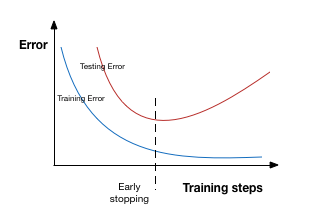

Συνεπώς, ο αριθμός των βημάτων εκπαίδευσης γίνεται μια ακόμα υπερ-παράμετρος της διαδικασίας μάθησης και έχει το πλεονέκτημα ότι δεν χρειάζεται να μεταβληθεί καθόλου η αντικειμενική συνάρτηση (όπως γίνεται λχ στη L1 και L2 ομαλοποίηση). Έτσι μπορεί να χρησιμοποιηθεί σε συνδυασμό και με άλλες τεχνικές ομαλοποίησης.

Από την άλλη, τα μειονεκτήματα του πρόωρου τερματισμού είναι ότι απαιτεί την αποθήκευση των παραμέτρων του μοντέλου σε κάθε βήμα εκπαίδευσης.

Επειδή η τεχνική του πρόωρου τερματισμού δεν είναι υλοποιημένη στο scikit learn, θα χρησιμοποιήσουμε το keras και πιο συγκεκριμένα την κλάση *EarlyStoppping*. Παρακάτω εισάγουμε τις βιβλιοθήκες που πρόκειται να χρησιμοποιήσουμε.

In [ ]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

from keras.initializers import RandomNormal

Ας ξεκινήσουμε με το μοντέλο πολυωνυμικής παλινδρόμησης 15ου βαθμού. Και σε αυτή την περίπτωση θα χρησιμοποιήσουμε την *PolynomialFeatures*, η οποία θα μετασχηματίσει την είσοδό μας από $x$ σε ένα array $[1\enspace x\enspace x^2\enspace x^3 \ldots x^{15}]$

In [ ]:
deg=15
pf = PolynomialFeatures(degree=deg)

# Απορρίπτουμε τον όρο της πρώτης στήλης, που είναι σταθερός και ίσος με 1 σε
# όλα τα δείγματα
x_train_p = pf.fit_transform(x_train)[:,1:]
x_test_p = pf.fit_transform(x_test)[:,1:]

Για να υλοποιήσουμε την πολυωνυμική παλινδρόμηση μέσω του keras, θα φτιάξουμε ένα απλό perceptron μιας εξόδου και 15 εισόδων (χωρίς συνάρτηση ενεργοποίησης στο νευρώνα εξόδου). Σε αυτή την περίπτωση, η σχέση εισόδου-εξόδου περιγράφεται από τη σχέση
\begin{equation}
y = \mathbf{w}\mathbf{x} + b \Rightarrow y = \sum\limits_{i=1}^{15}w_i*x^i + b
\end{equation}
δηλαδή τη γνωστή μας πολυωνυμική συνάρτηση 15ου βαθμού.

Αρχικοποιούμε τα βάρη (συντελεστές του πολυωνύμου) σε τυχαίες τιμές, τις οποίες δειγματοληπτούμε από την κανονική κατανομή με μέση τιμή 1 και τυπική απόκλιση 1.

In [ ]:
init_k=RandomNormal(mean=1.0, stddev=1.0, seed=seed_value)
mdl = Sequential([Dense(1, kernel_initializer=init_k, activation=None)])

Όπως προηγουμένως, θα χρησιμοποιήσουμε το ΜΤΣ ως συνάρτηση ωφέλειας και τη στοχαστική κατάβαση κλίσης ως συνάρτηση ενημέρωσης βαρών

In [ ]:
mdl.compile(SGD(), loss='mse')

Εκπαιδεύουμε το μοντέλο μας για 50 εποχές. Επιλέγουμε ως μέθοδο ομαλοποίησης τον πρόωρο τερματισμό, ο οποίος τερματίζει την εκπαίδευση όταν η τιμή της συνάρτησης ωφέλειας στα δεδομένα ελέγχου δεν βελτιώνεται στο σύνολο επαλήθευσης για έναν ορισμένο αριθμό επαναλήψεων (5).

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5,
                         restore_best_weights=True)
history = mdl.fit(x_train_p, Y_train, epochs=50, batch_size=1,
                  validation_data=(x_test_p, Y_test), callbacks=[callback],
                  verbose=0)

Όπως βλέπουμε, η εκπαίδευση τερματίστηκε πριν τις 50 εποχές (στην πράξη, το keras "έτρεξε" και τις 50 εποχές, επέστρεψε όμως το confguration του συστήματος όπως ήταν στη βέλτιστη εποχή, σύμφωνα με το κριτήριο του πρόωρου τερματισμού)

In [ ]:
print('Πλήθος εποχών ', len(history.history['loss']))

Πλήθος εποχών  29


Εμφανίζουμε τις μετρικές απόδοσης καθώς και τις γραφικές παραστάσεις

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Ορθότητα στο σύνολο δεδομένων εκπαίδευσης: 91.47%
Ορθότητα στο σύνολο δεδομένων ελέγχου: 93.59%

Μέσο Τετραγωνικό Σφάλμα στα δείγματα εκπαίδευσης: 0.0479
Μέσο Τετραγωνικό Σφάλμα στα δείγματα ελέγχου: 0.0399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


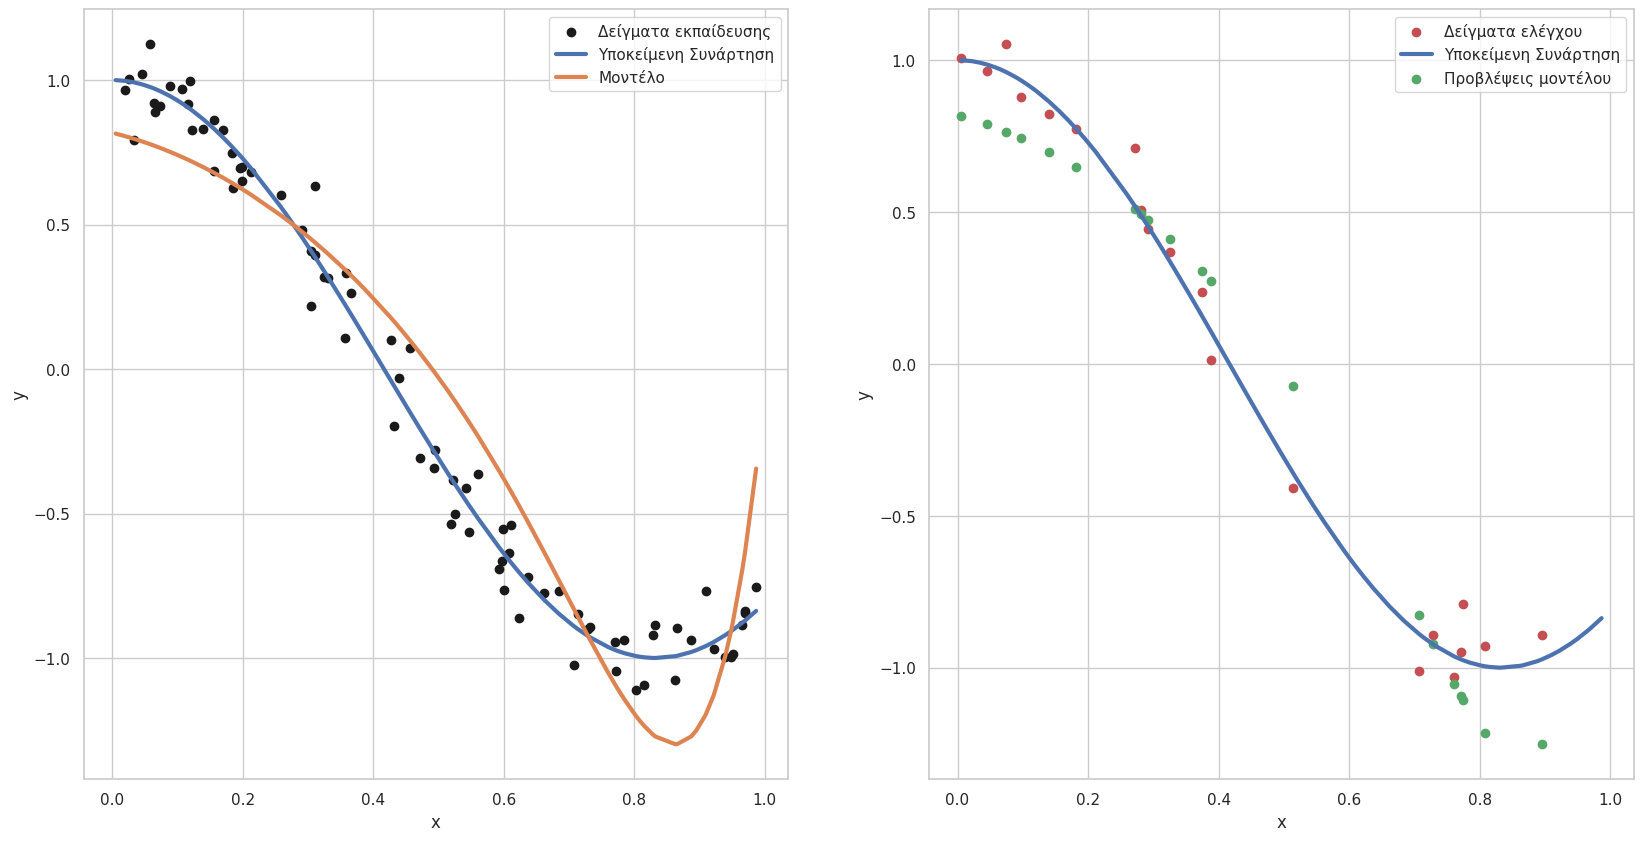

In [ ]:
compute_metrics(mdl, x_train_p, Y_train, x_test_p, Y_test)
compare_plots(x, X_train, Y_train, X_test, Y_test, mdl.predict(x_test_p),
              mdl.predict(pf.fit_transform(x.reshape(-1,1))[:,1:]))

Στο συγκεκριμένο παράδειγμα, παρατηρούμε ότι η τεχνική του πρόωρου τερματισμού δεν εμφανίζει τόσο καλά αποτελέσματα όσο η L1 και η L2 ομαλοποίηση. Αυτό βέβαια δε σημαίνει ότι γενικότερα ο πρόωρος τερματισμός είναι υποδεέστερη τεχνική, μιας και σε άλλα πεδία εφαρμογών (π.χ. σε εφαρμογές βαθιάς μάθησης) εμφναίζει εφάμιλλα ή και καλύτερα αποτελέσματα (υπό προϋποθέσεις, αποδεικνύεται ότι η τεχνική του πρώορου τερματισμού σχετίζεται με την L2 ομαλοποίηση).

## Συμπεράσματα

Στο συγκεκριμένο notebook εξετάσαμε την έννοια της χωρητικότητας, τα φαινόμενα της υπο-προσαρμογής και της υπερ-προσαρμογής, καθώς και το πως με τη χρήση τεχνικών ομαλοποίησης μπορούμε προσεγγιστικά να κατασκευάσουμε ένα σύστημα με τη βέλτιστη χωρητικότητα για το πρόβλημα που εξετάζουμε. Τα συμπεράσματα μπορούν να συνοψιστούν στα παρακάτω σημεία:

*   Για να μπορέσει να μάθει τα δεδομένα ενός προβλήματος, ένα σύστημα μηχανικής μάθησης πρέπει να έχει την κατάλληλη χωρητικότητα
*   Επειδή για τα περισσότερα προβλήματα είναι δύσκολο να τη γνωρίζουμε εκ των προτέρων, ξεκινάμε με ένα σύστημα υψηλής χωρητικότητας και εφαρμόζουμε τεχνικές ομαλοποίησης προκειμένου να περιορίσουμε τη χωρητικότητά του
* Στη L2 κανονικοποίηση αυτό γίνεται προσθέτοντας όρο ποινής στις παραμέτρους του μοντέλου ανάλογο του τετραγώνου του εύρους των παραμέτρων. Έτσι, σε κάθε επανάληψη οι τιμές των παραμέτρων μειώνονται αναλογικά με την προηγούμενη τιμή που είχαν
* Στη L1 κανονικοποίηση, η χωρητικότητα του μοντέλου περιορίζεται προσθέτοντας όρο ποινής ανάλογο με την απόλυτη τιμή των παραμέτρων. Σε αυτή την περίπτωση οι τιμές των παραμέτρων μειώνονται πιο απότομα, οδηγώντας σε αραιότερες αναπαραστάσεις του χώρου των παραμέτρων
* Ο πρόωρος τερματισμός είναι μια εναλλακτική τεχνική ομαλοποίησης, στην οποία ο αριθμός των βημάτων γίνεται υπερ-παράμετρος του μοντέλου. Είναι αποδοτικός για συγκεκριμένες κατηγορίες προβλημάτων.

